In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connect = sqlite3.connect('data.db')
cursor = connect.cursor()

In [3]:
res = pd.read_sql(
'''
SELECT *
FROM data
LIMIT 5;
''',connect)
res

,i,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor,employment_type
0,0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000,CONTRACTOR
1,1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000,CONTRACTOR
2,2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706,PART_TIME
3,3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000,FULL_TIME
4,4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000,PART_TIME


In [4]:
res = pd.read_sql(
'''
PRAGMA table_info(data);
''',connect)
res

,cid,name,type,notnull,dflt_value,pk
0,0,i,INTEGER,0,None,0
1,1,Unnamed: 0,INTEGER,0,None,0
2,2,company,TEXT,0,None,0
3,3,department,TEXT,0,None,0
4,4,employee_id,INTEGER,0,None,0
5,5,age,INTEGER,0,None,0
6,6,age_when_joined,INTEGER,0,None,0
7,7,years_in_the_company,INTEGER,0,None,0
8,8,salary,REAL,0,None,0
9,9,annual_bonus,REAL,0,None,0


##### Note: Employee ids are repeated, i column is index and some columns are not very useful (Unnamed:0, full_time, part_time, contractor)

### How many employees does each company have?

In [5]:
res = pd.read_sql(
'''
SELECT
    company,
    COUNT(employee_id) AS employees
FROM data
GROUP BY company;
''',connect)
res

,company,employees
0,Cheerper,1440
1,Glasses,2369
2,Pear,1191


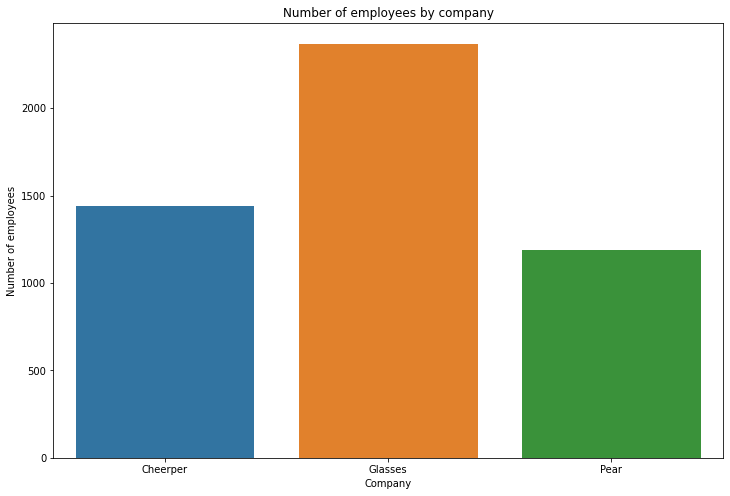

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
rel = sns.barplot(data=res, x="company",y='employees').set(title='Number of employees by company',xlabel='Company',ylabel='Number of employees')

### How many departments does each company have?

In [7]:
res = pd.read_sql(
'''
SELECT
    company,
    COUNT(DISTINCT department) AS departments
FROM data
GROUP BY company;
''',connect)
res

,company,departments
0,Cheerper,5
1,Glasses,6
2,Pear,4


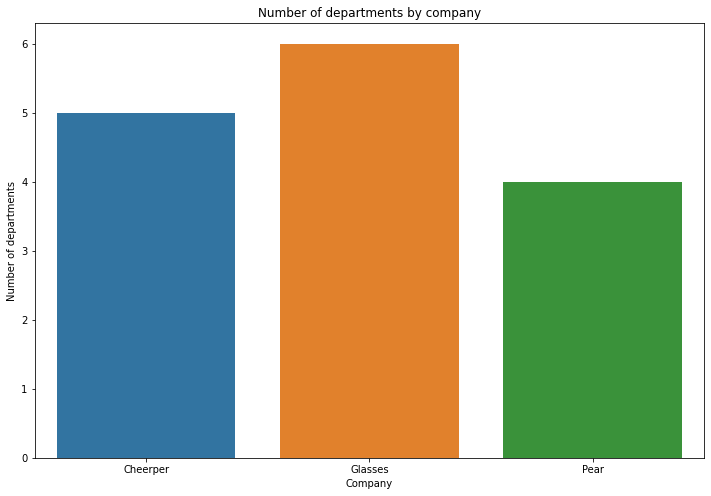

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
rel = sns.barplot(data=res, x="company",y='departments').set(title='Number of departments by company',xlabel='Company',ylabel='Number of departments')
plt.show()

### How many employees does each department have?

In [9]:
res = pd.read_sql(
'''
SELECT
    department,
    COUNT(employee_id) AS count
FROM data
GROUP BY department;
''',connect)
res

,department,count
0,AI,1128
1,BigData,797
2,Design,720
3,Sales,653
4,Search Engine,1071
5,Support,631


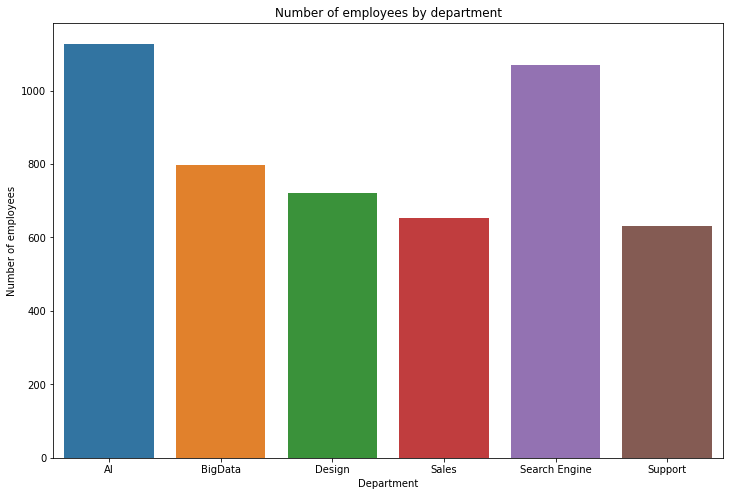

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
rel = sns.barplot(data=res, x="department",y='count').set(title='Number of employees by department',xlabel='Department',ylabel='Number of employees')
plt.show()

### Employees by company and department

In [11]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    COUNT(employee_id) AS count
FROM data
GROUP BY company,department;
''',connect)
res

,company,department,count
0,Cheerper,AI,21
1,Cheerper,BigData,568
2,Cheerper,Design,2
3,Cheerper,Search Engine,227
4,Cheerper,Support,622
5,Glasses,AI,964
6,Glasses,BigData,229
7,Glasses,Design,308
8,Glasses,Sales,23
9,Glasses,Search Engine,836


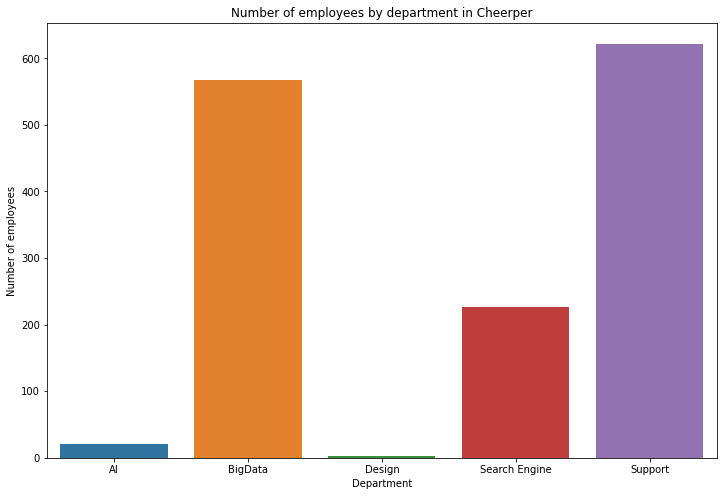

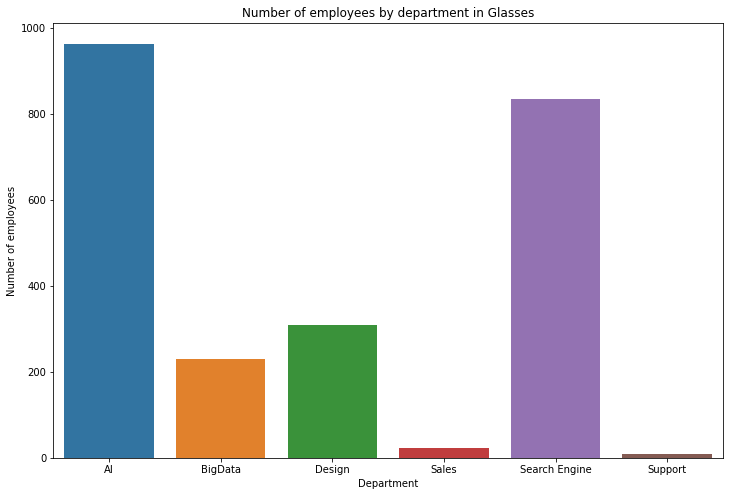

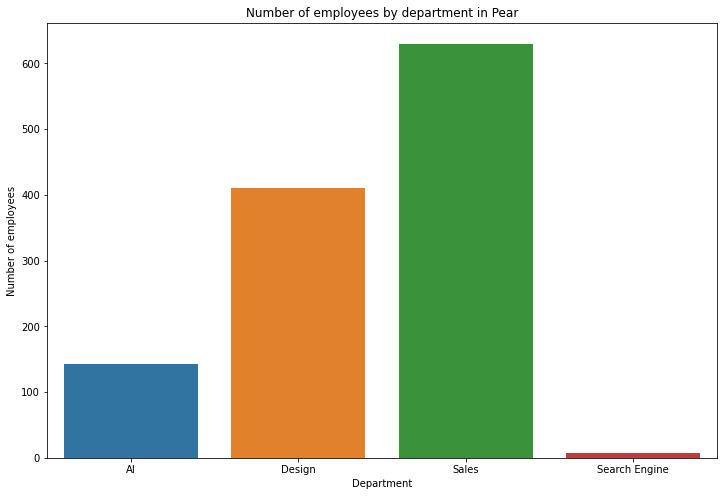

In [12]:
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig,ax = plt.subplots(figsize=(12,8))
    rel = sns.barplot(data=d, x="department",y='count',ci=None).set(title='Number of employees by department in ' + company, xlabel='Department', ylabel='Number of employees')
    plt.show()

### How many employees does each company have according to their employment type?

In [13]:
res = pd.read_sql(
'''
SELECT
    company,
    employment_type,
    COUNT(*) AS count
FROM data
GROUP BY company, employment_type
ORDER BY company, employment_type;
''',connect)
res

,company,employment_type,count
0,Cheerper,CONTRACTOR,151
1,Cheerper,FULL_TIME,158
2,Cheerper,PART_TIME,1131
3,Glasses,CONTRACTOR,929
4,Glasses,FULL_TIME,908
5,Glasses,PART_TIME,532
6,Pear,CONTRACTOR,613
7,Pear,FULL_TIME,564
8,Pear,PART_TIME,14


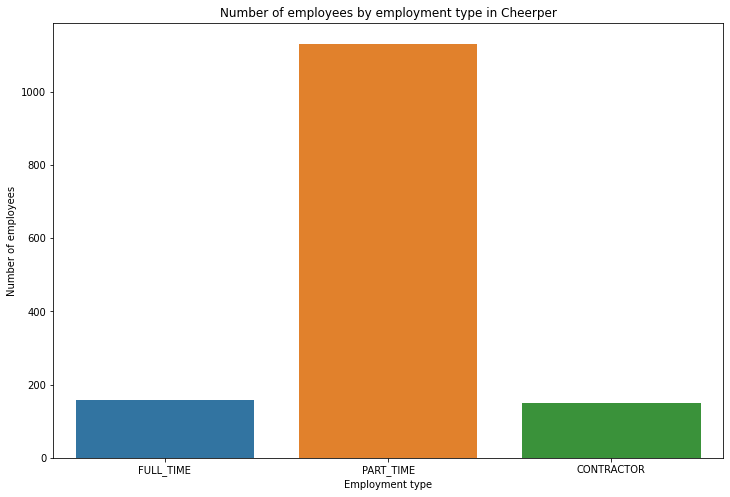

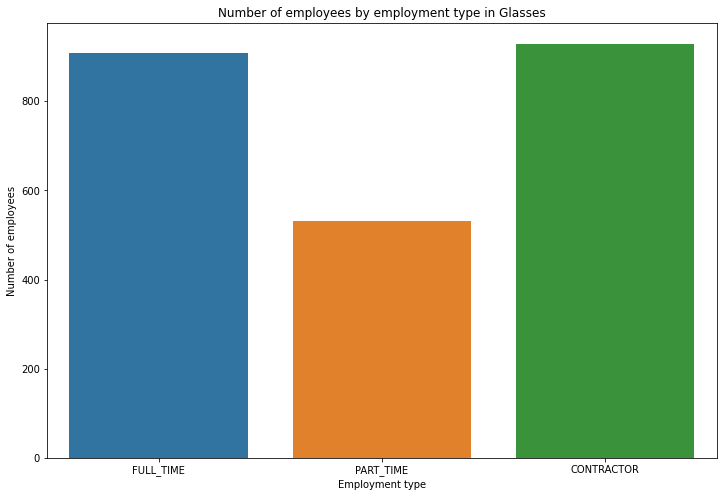

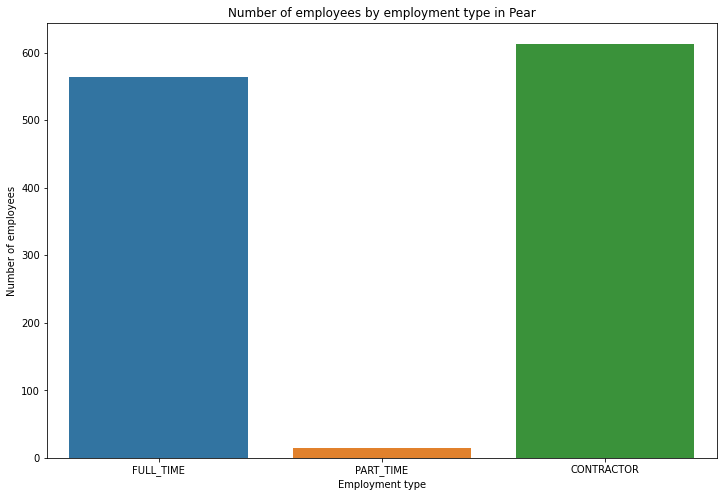

In [14]:
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig,ax = plt.subplots(figsize=(12,8))
    rel = sns.barplot(data=d, x="employment_type",y='count',ci=None, order = ['FULL_TIME','PART_TIME', 'CONTRACTOR']).set(title='Number of employees by employment type in ' + company, xlabel='Employment type', ylabel='Number of employees')
    plt.show()

### Maximum, minimum and average salary according to employment type

In [15]:
res = pd.read_sql(
'''
SELECT
    employment_type,
    MAX(salary) AS max_salary,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary
FROM data
GROUP BY employment_type
ORDER BY employment_type;
''',connect)
res

,employment_type,max_salary,min_salary,avg_salary
0,CONTRACTOR,149578.868595,40000.0,77368.234987
1,FULL_TIME,153000.000000,40000.0,111095.233919
2,PART_TIME,147670.003681,40000.0,73809.906928


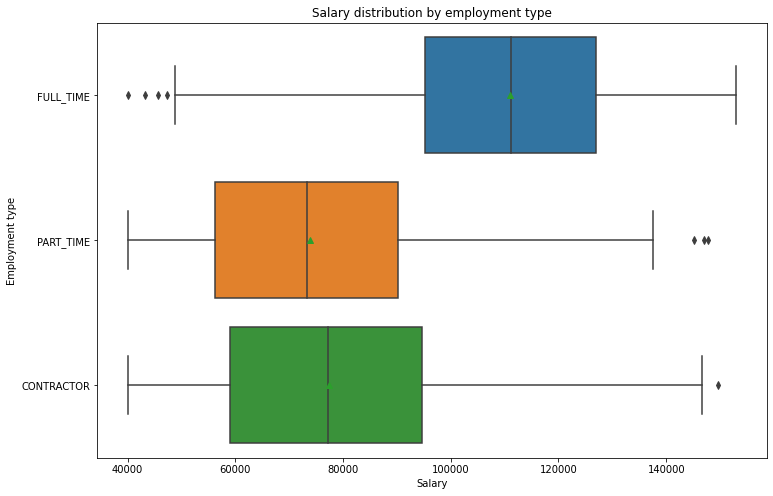

In [16]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT employment_type,salary FROM data;''',connect)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=res, x="salary", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Salary distribution by employment type', xlabel='Salary', ylabel='Employment type')
plt.show()

### Maximum, minimum and average salary according to employment type and company

In [17]:
res = pd.read_sql(
'''
SELECT
    company,
    employment_type,
    MAX(salary) AS max_salary,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary
FROM data
GROUP BY company,employment_type
ORDER BY company,employment_type;
''',connect)
res

,company,employment_type,max_salary,min_salary,avg_salary
0,Cheerper,CONTRACTOR,149578.868595,40000.000000,67734.348798
1,Cheerper,FULL_TIME,153000.000000,40000.000000,110073.835651
2,Cheerper,PART_TIME,147670.003681,40000.000000,71716.205395
3,Glasses,CONTRACTOR,146724.678943,40000.000000,74278.548910
4,Glasses,FULL_TIME,153000.000000,47363.962899,107152.262882
5,Glasses,PART_TIME,145187.827274,40000.000000,78276.748533
6,Pear,CONTRACTOR,139685.847767,40000.000000,84423.757302
7,Pear,FULL_TIME,153000.000000,43278.832612,117729.274039
8,Pear,PART_TIME,99405.650209,45744.554952,73211.099812


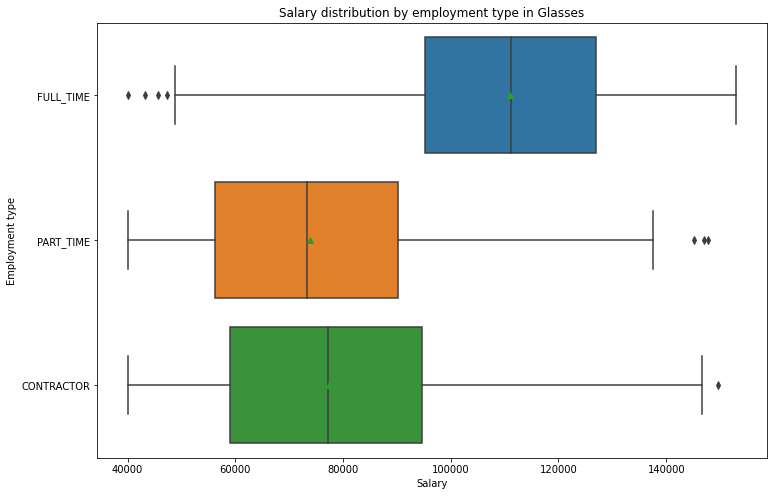

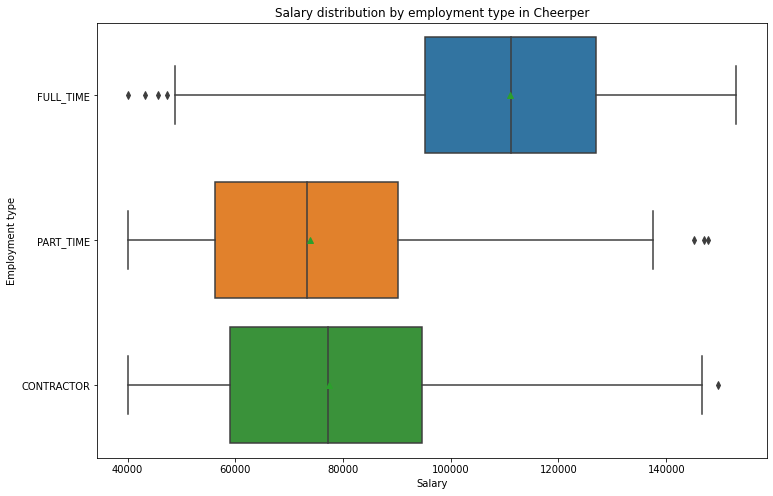

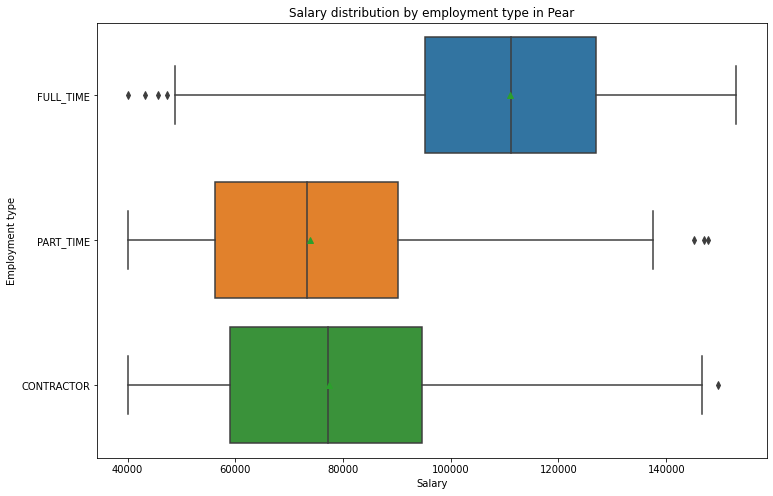

In [18]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,employment_type,salary FROM data;''',connect)
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data=res, x="salary", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Salary distribution by employment type in ' + company, xlabel='Salary', ylabel='Employment type')
    plt.show()

### Maximum, minimum and average bonus according to employment type

In [19]:
res = pd.read_sql(
'''
SELECT
    employment_type,
    MAX(annual_bonus) AS max_bonus,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus
FROM data
GROUP BY employment_type
ORDER BY employment_type;
''',connect)
res

,employment_type,max_bonus,min_bonus,avg_bonus
0,CONTRACTOR,24792.91,9000.0,19526.771816
1,FULL_TIME,24792.91,9000.0,17408.287668
2,PART_TIME,24792.91,9000.0,18830.654381


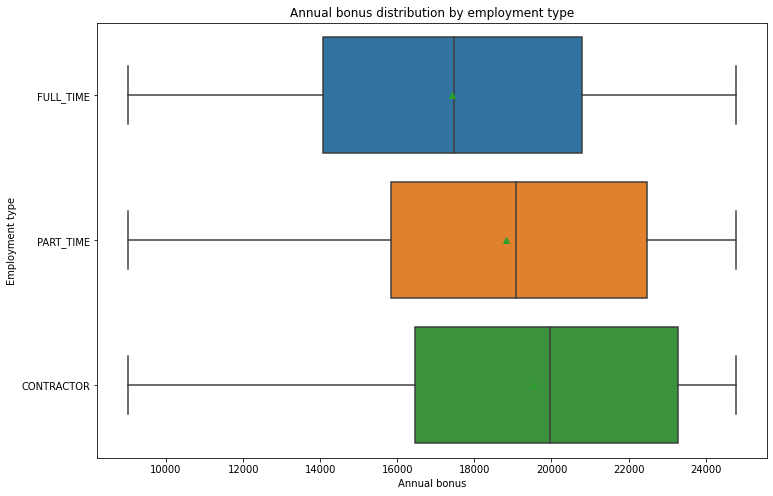

In [20]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT employment_type,annual_bonus FROM data;''',connect)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=res, x="annual_bonus", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Annual bonus distribution by employment type', xlabel='Annual bonus', ylabel='Employment type')
plt.show()

### Maximum, minimum and average bonus according to employment type and company

In [21]:
res = pd.read_sql(
'''
SELECT
    company,
    employment_type,
    MAX(annual_bonus) AS max_bonus,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus
FROM data
GROUP BY company,employment_type
ORDER BY company,employment_type;
''',connect)
res

,company,employment_type,max_bonus,min_bonus,avg_bonus
0,Cheerper,CONTRACTOR,24792.91,9000.00000,17909.538192
1,Cheerper,FULL_TIME,24792.91,9000.00000,14861.347826
2,Cheerper,PART_TIME,24792.91,9000.00000,18130.219966
3,Glasses,CONTRACTOR,24792.91,9000.00000,19261.671719
4,Glasses,FULL_TIME,24792.91,9000.00000,17135.262818
5,Glasses,PART_TIME,24792.91,9000.00000,20273.519085
6,Pear,CONTRACTOR,24792.91,9000.00000,20326.902759
7,Pear,FULL_TIME,24792.91,9000.00000,18561.342737
8,Pear,PART_TIME,24792.91,16142.42242,20586.890143


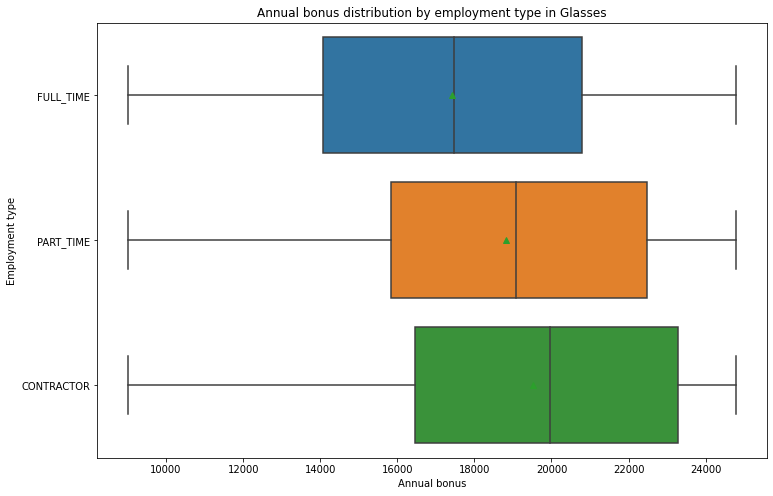

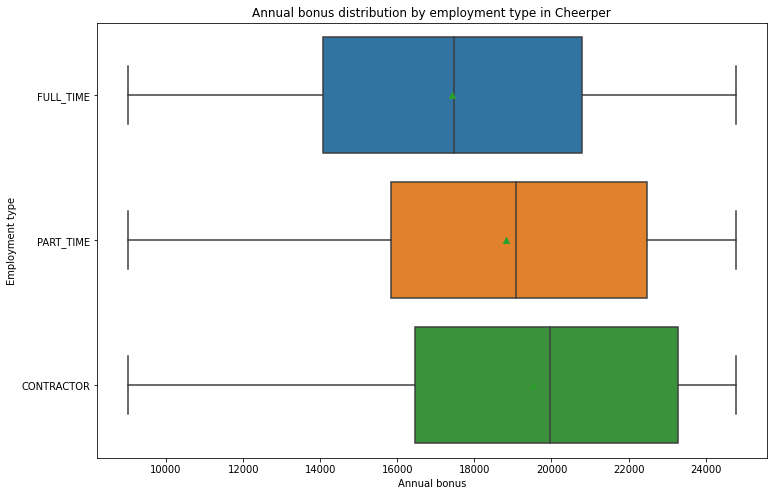

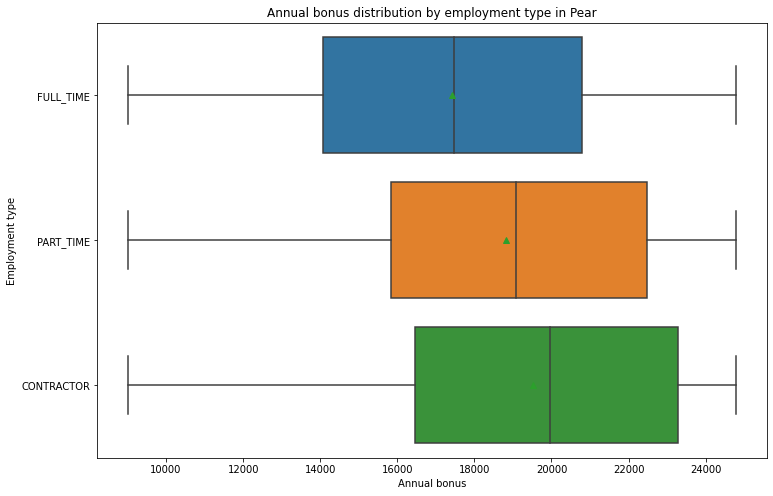

In [22]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,employment_type,annual_bonus FROM data;''',connect)
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data=res, x="annual_bonus", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Annual bonus distribution by employment type in ' + company, xlabel='Annual bonus', ylabel='Employment type')
    plt.show()

### Employees by company, department and employment type

In [23]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    employment_type,
    COUNT(*) AS count
FROM data
GROUP BY company,department,employment_type
ORDER BY company,department,employment_type;
''',connect)
res

,company,department,employment_type,count
0,Cheerper,AI,FULL_TIME,14
1,Cheerper,AI,PART_TIME,7
2,Cheerper,BigData,CONTRACTOR,72
3,Cheerper,BigData,FULL_TIME,54
4,Cheerper,BigData,PART_TIME,442
5,Cheerper,Design,FULL_TIME,2
6,Cheerper,Search Engine,CONTRACTOR,15
7,Cheerper,Search Engine,FULL_TIME,80
8,Cheerper,Search Engine,PART_TIME,132
9,Cheerper,Support,CONTRACTOR,64


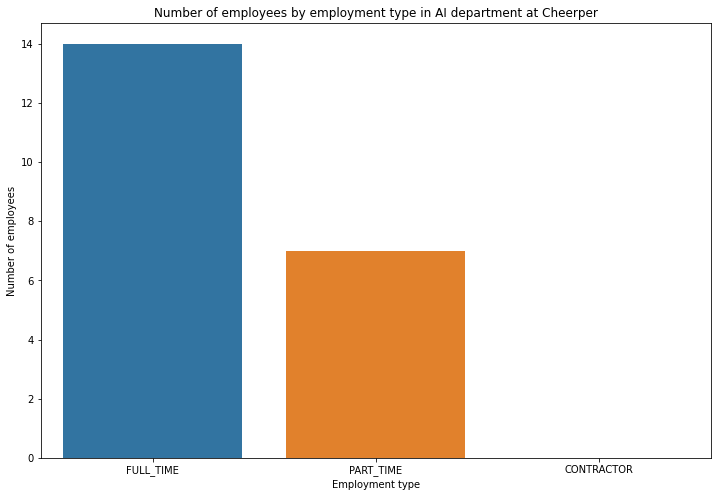

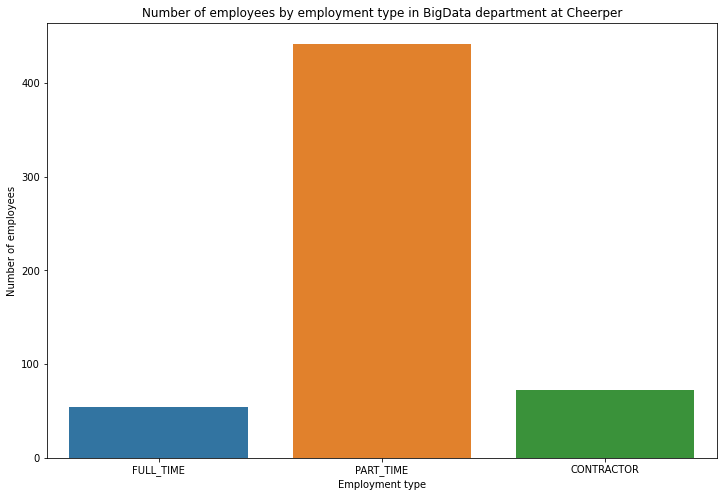

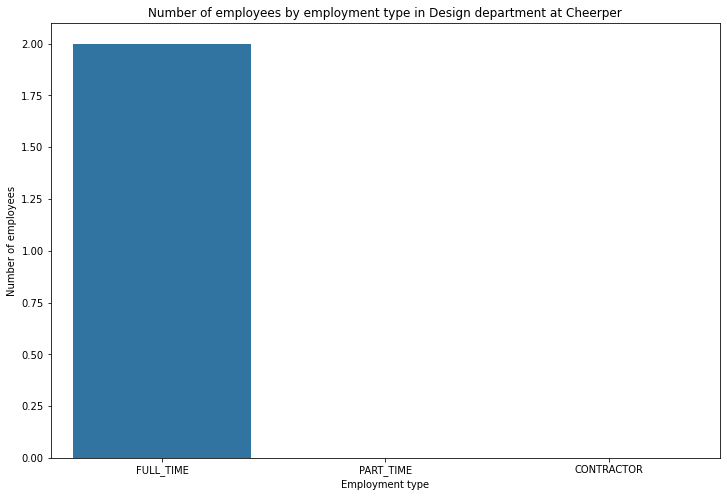

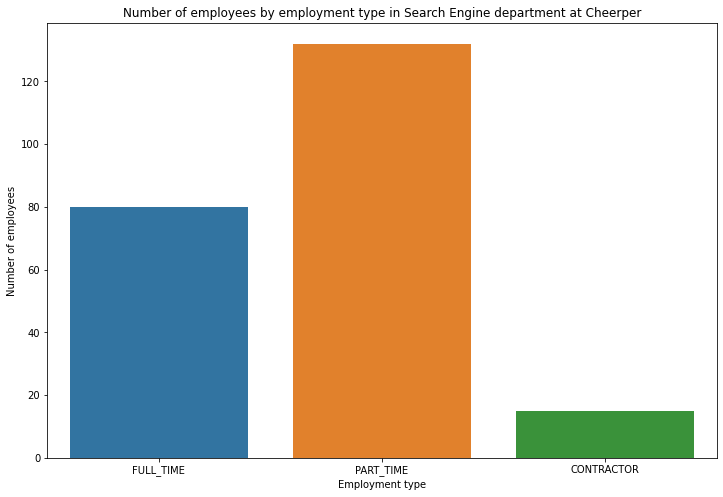

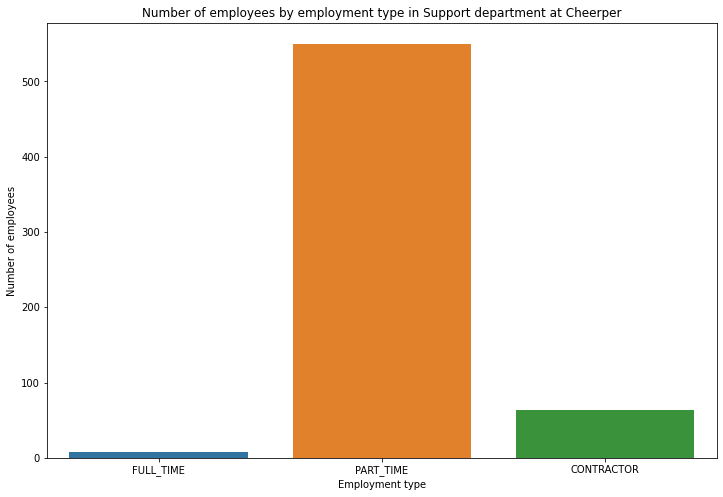

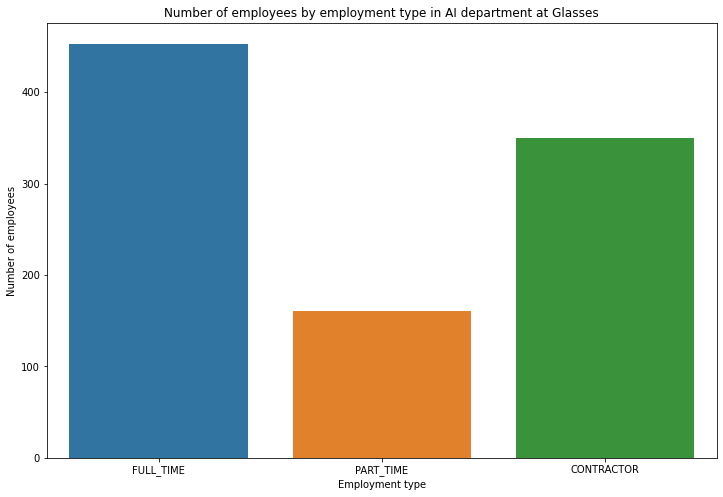

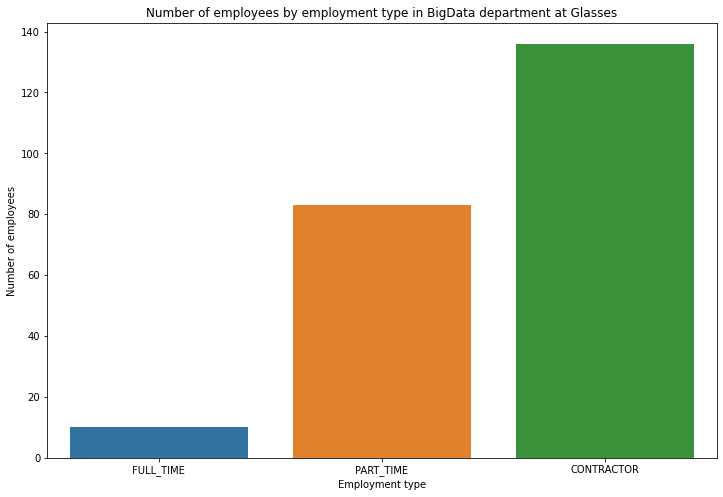

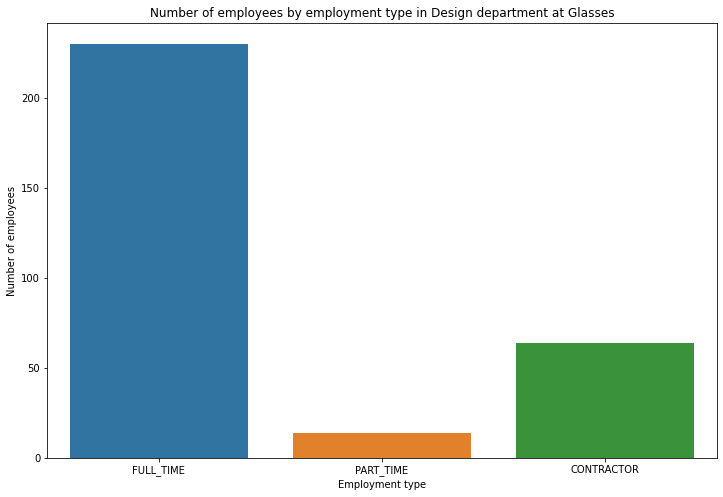

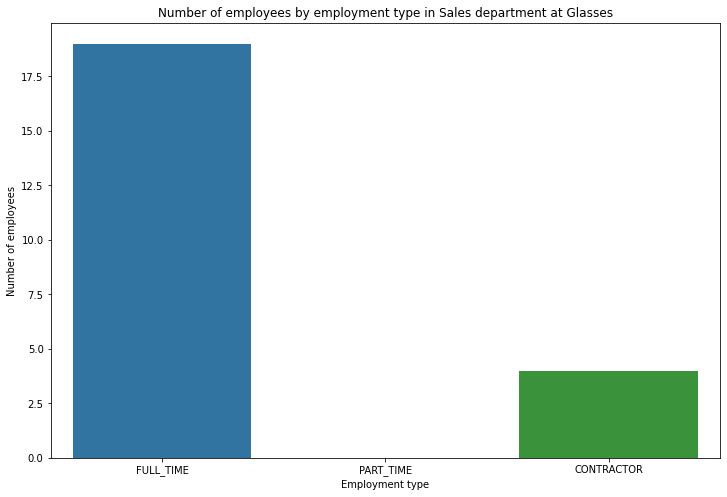

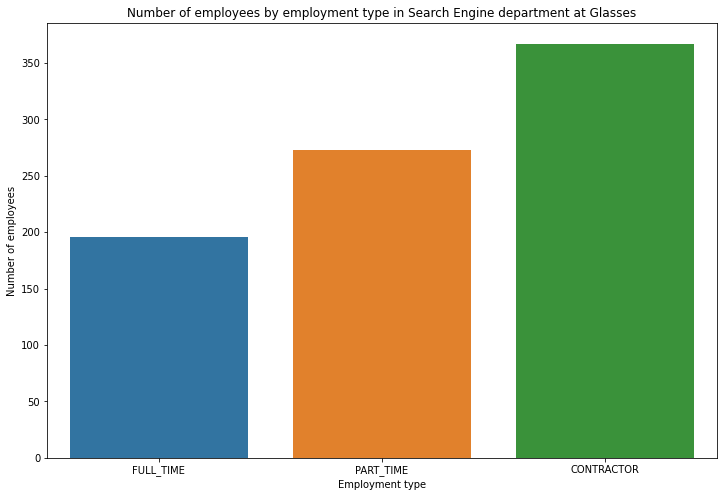

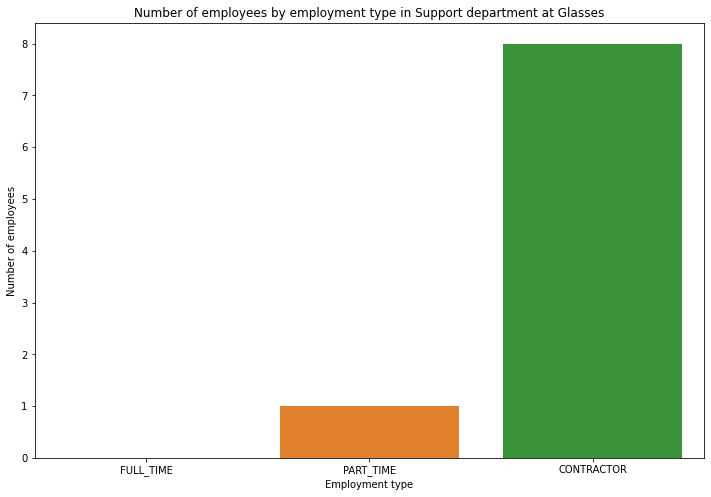

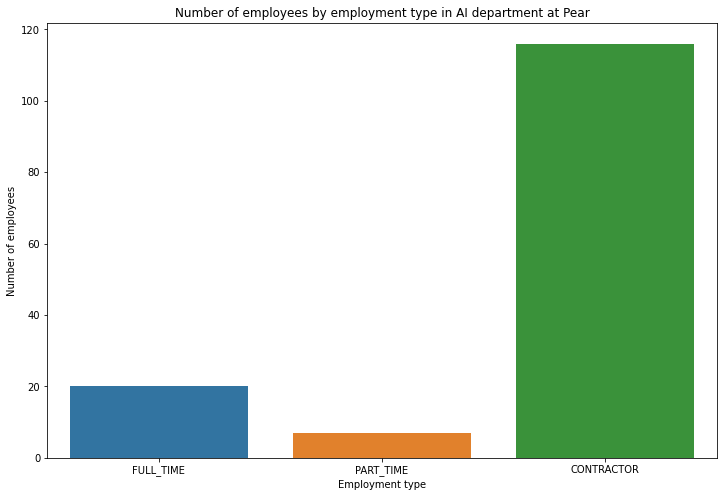

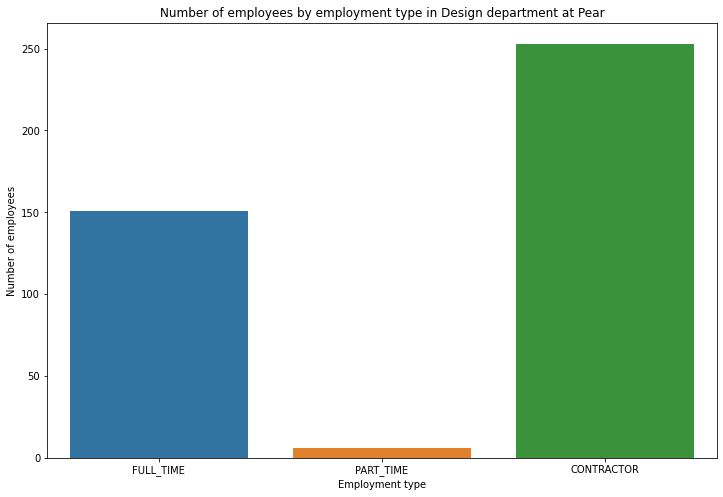

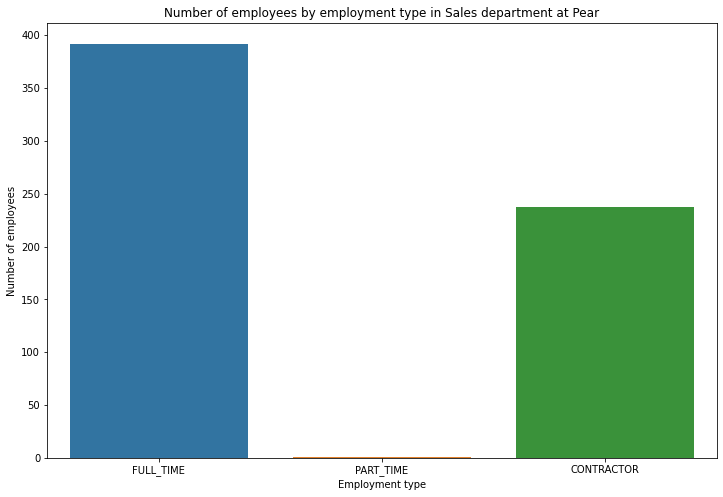

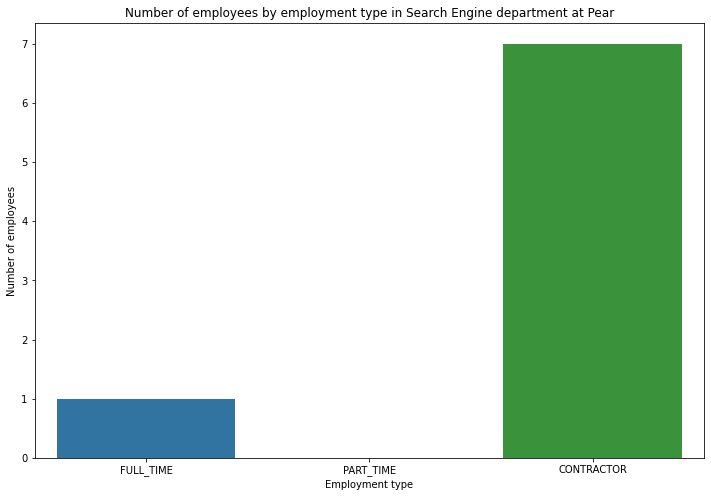

In [24]:
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig,ax = plt.subplots(figsize=(12,8))
        rel = sns.barplot(data=d, x="employment_type",y='count',ci=None, order = ['FULL_TIME','PART_TIME', 'CONTRACTOR']).set(title='Number of employees by employment type in ' + department + ' department at ' + company, xlabel='Employment type', ylabel='Number of employees')
        plt.show()

### Maximum, minimum and average salary according to employment type, company and department

In [25]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    employment_type,
    MAX(salary) AS max_salary,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary
FROM data
GROUP BY company,department,employment_type
ORDER BY company,department,employment_type;
''',connect)
res

,company,department,employment_type,max_salary,min_salary,avg_salary
0,Cheerper,AI,FULL_TIME,153000.000000,89907.934093,128626.067205
1,Cheerper,AI,PART_TIME,118223.153127,55784.902664,91664.416729
2,Cheerper,BigData,CONTRACTOR,140926.927202,40000.000000,74289.014452
3,Cheerper,BigData,FULL_TIME,153000.000000,55125.034641,100871.356074
4,Cheerper,BigData,PART_TIME,146971.942754,40000.000000,78170.399394
5,Cheerper,Design,FULL_TIME,153000.000000,151214.262719,152107.131360
6,Cheerper,Search Engine,CONTRACTOR,122082.103601,47271.236119,87956.936605
7,Cheerper,Search Engine,FULL_TIME,153000.000000,40000.000000,111828.625258
8,Cheerper,Search Engine,PART_TIME,147670.003681,44345.721956,85668.986537
9,Cheerper,Support,CONTRACTOR,149578.868595,40000.000000,55620.680920


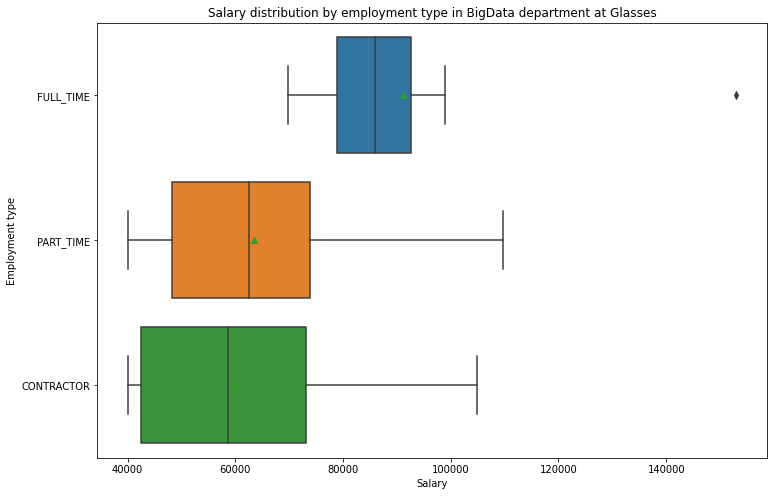

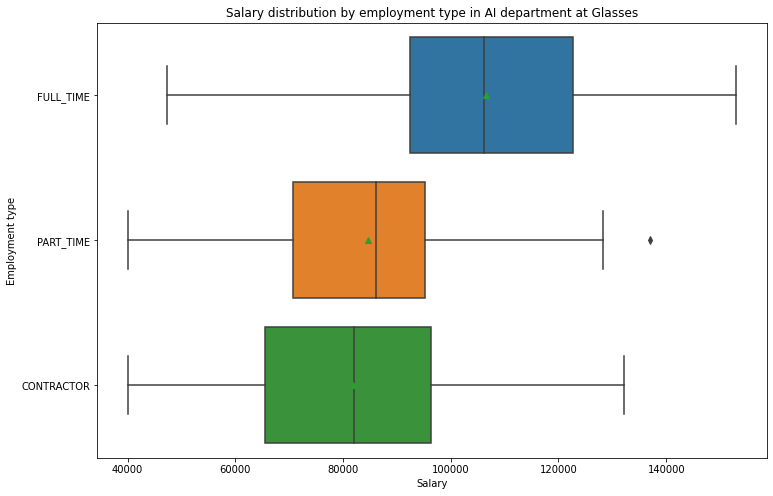

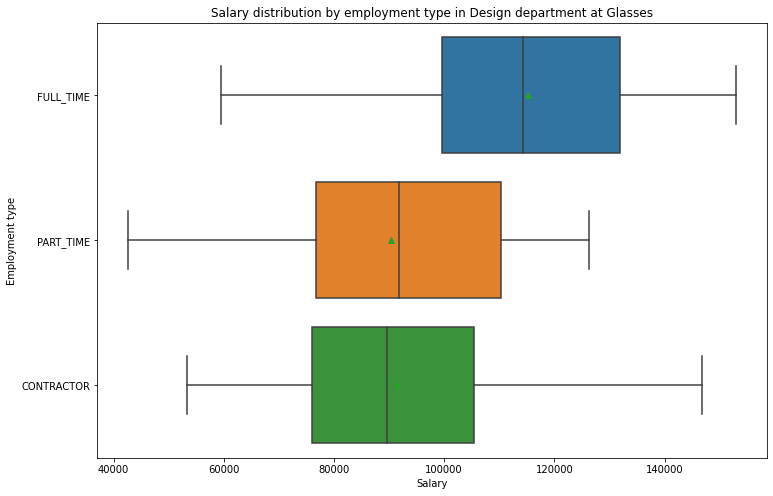

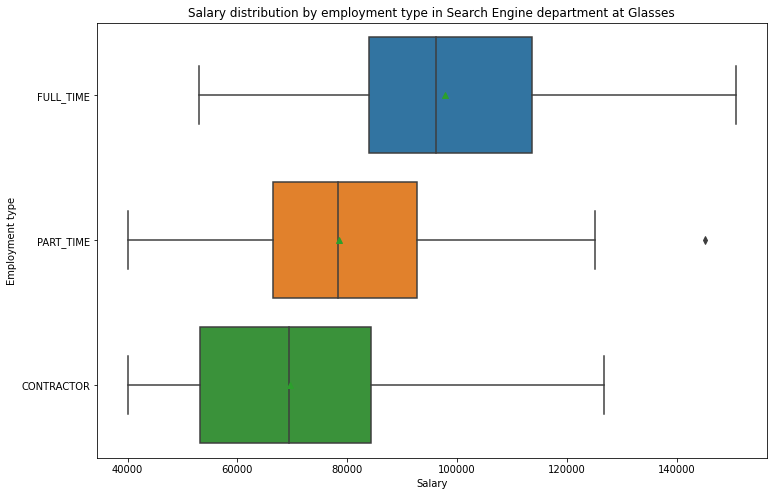

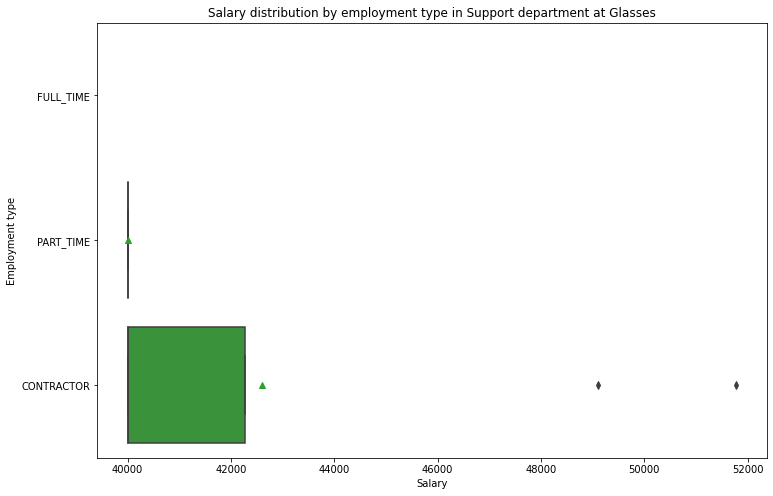

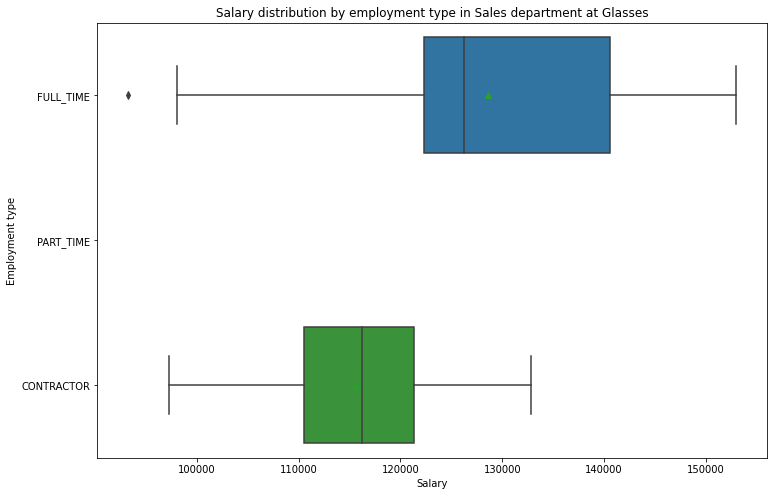

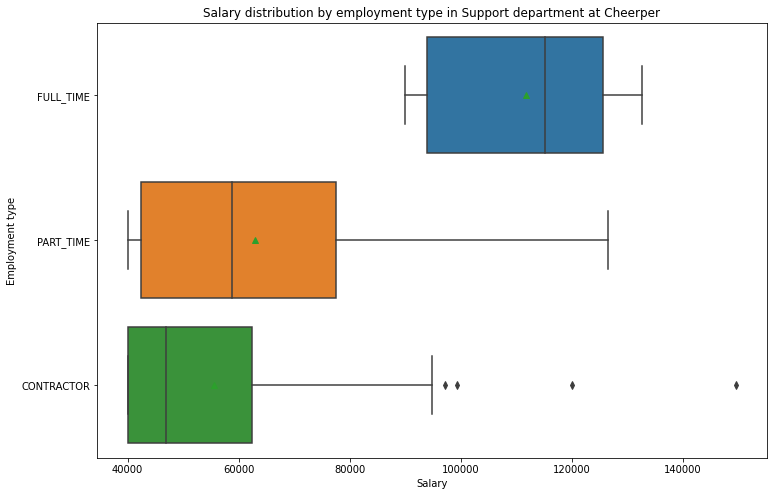

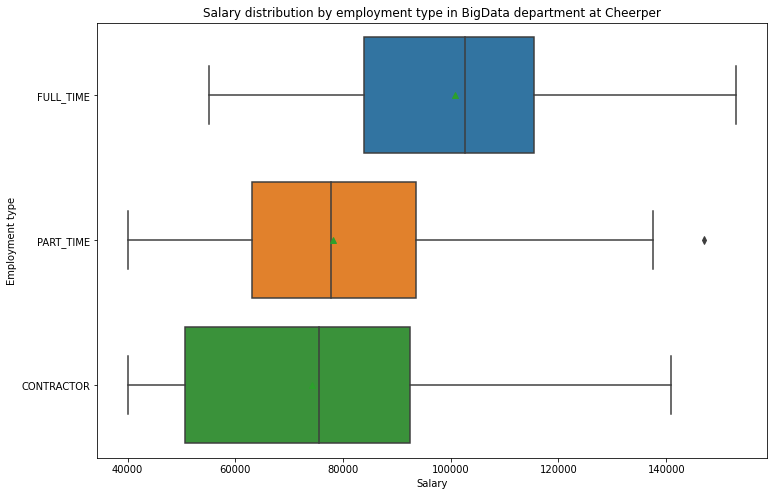

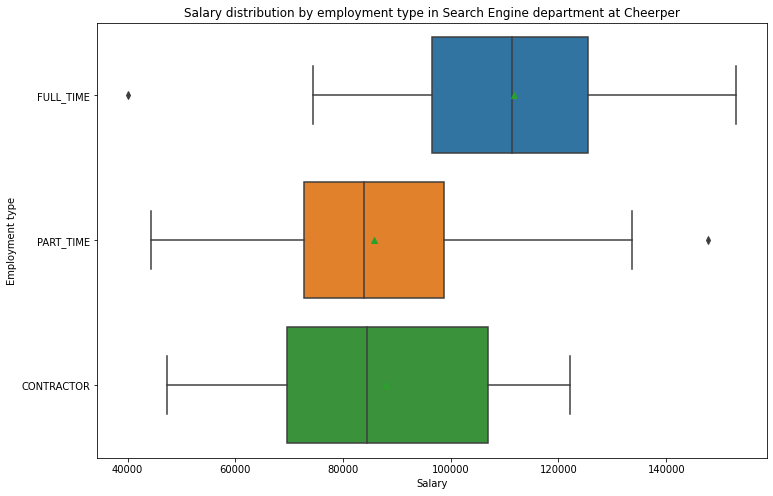

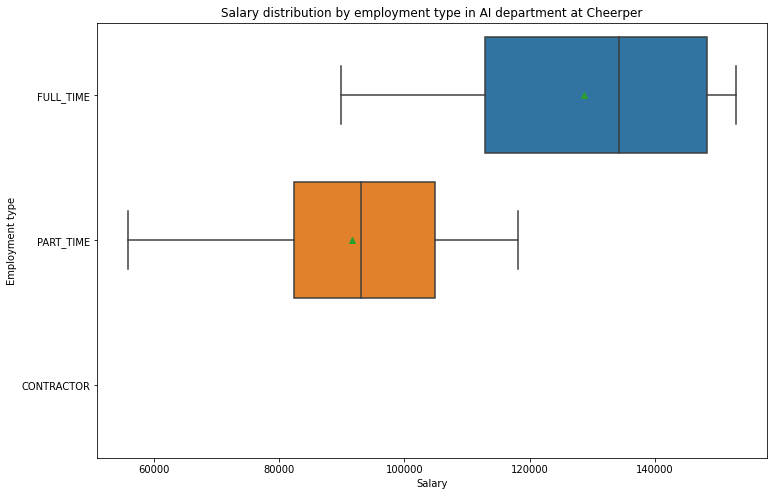

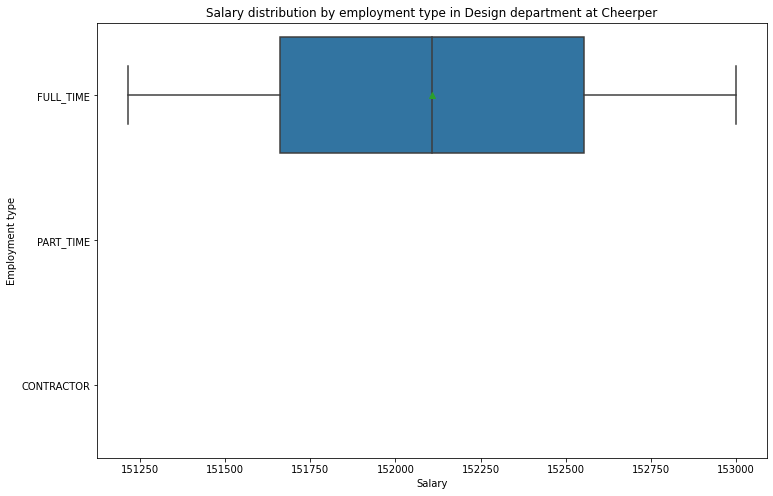

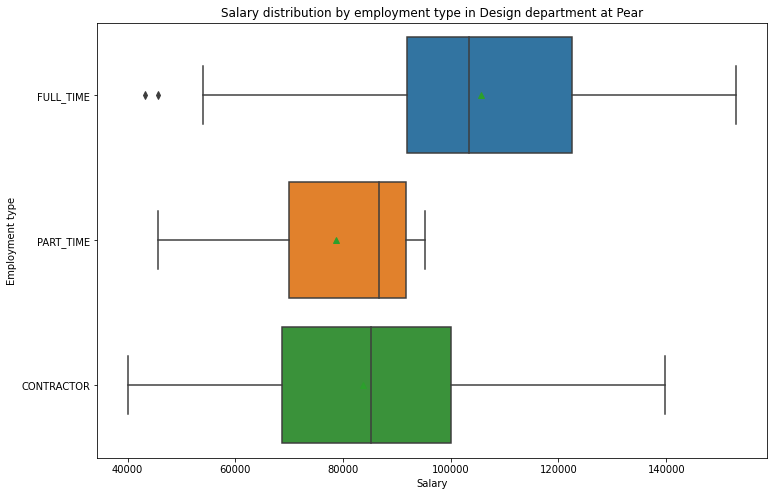

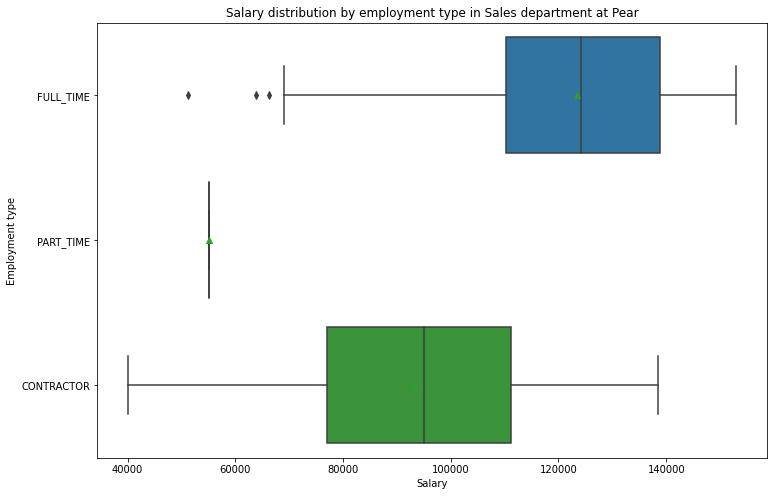

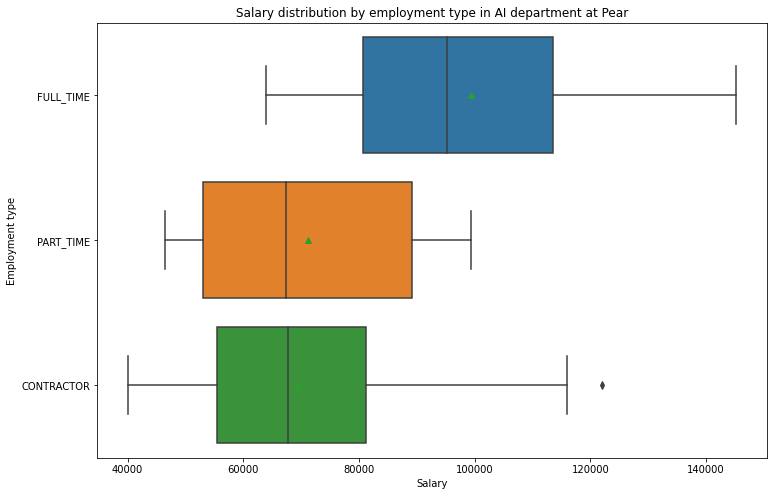

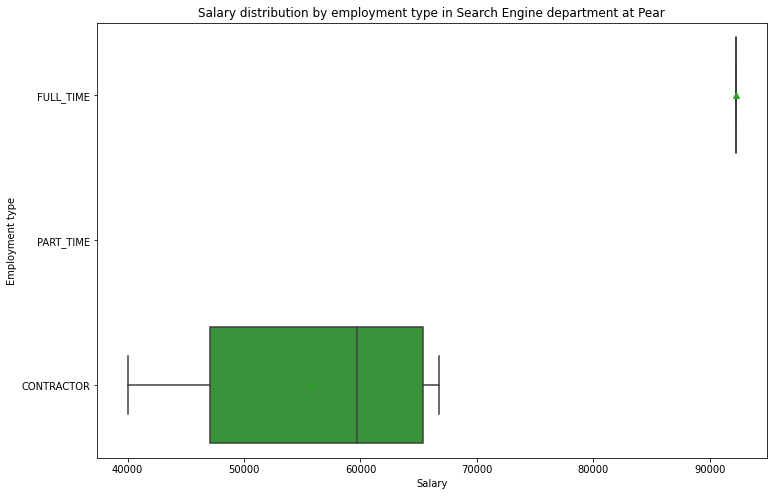

In [26]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,department,employment_type,salary FROM data;''',connect)
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig, ax = plt.subplots(figsize=(12,8))
        sns.boxplot(data=d, x="salary", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Salary distribution by employment type in ' + department + ' department at ' + company, xlabel='Salary', ylabel='Employment type')
        plt.show()

### Maximum, minimum and average bonus according to employment type, company and department

In [27]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    employment_type,
    MAX(annual_bonus) AS max_bonus,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus
FROM data
GROUP BY company,department,employment_type
ORDER BY company,department,employment_type;
''',connect)
res

,company,department,employment_type,max_bonus,min_bonus,avg_bonus
0,Cheerper,AI,FULL_TIME,24792.910000,9000.000000,17767.618359
1,Cheerper,AI,PART_TIME,24792.910000,10221.591312,17518.346292
2,Cheerper,BigData,CONTRACTOR,24792.910000,9000.000000,18157.787709
3,Cheerper,BigData,FULL_TIME,24792.910000,9000.000000,13948.417587
4,Cheerper,BigData,PART_TIME,24792.910000,9000.000000,18436.567557
5,Cheerper,Design,FULL_TIME,24792.910000,20086.823590,22439.866795
6,Cheerper,Search Engine,CONTRACTOR,24792.910000,9907.686304,16396.297371
7,Cheerper,Search Engine,FULL_TIME,24792.910000,9000.000000,14768.433686
8,Cheerper,Search Engine,PART_TIME,24792.910000,9000.000000,18655.709903
9,Cheerper,Support,CONTRACTOR,24792.910000,9075.918908,17984.923303


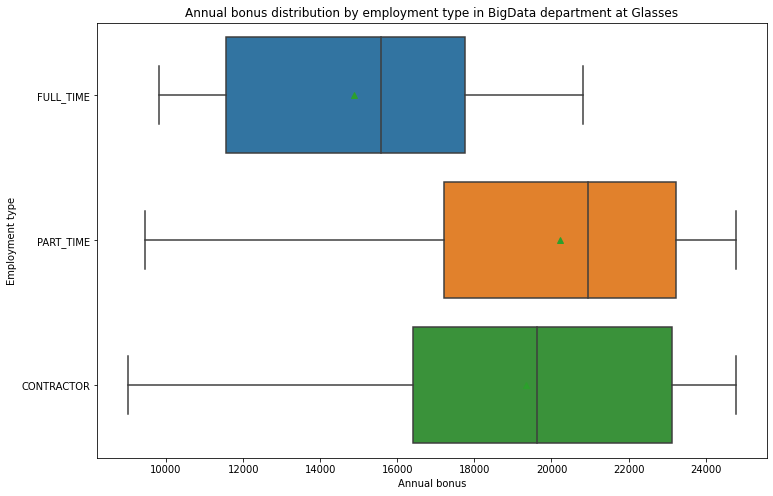

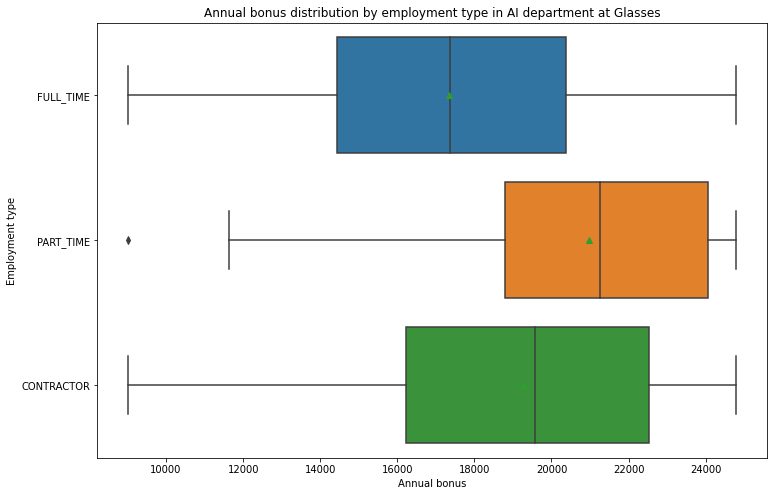

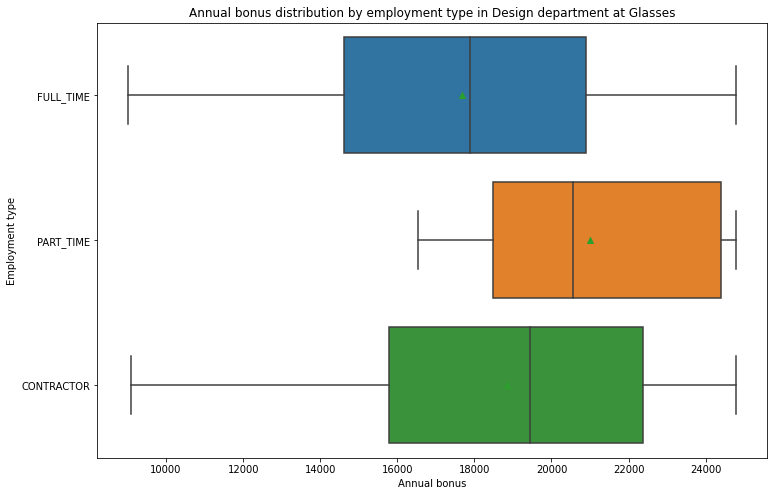

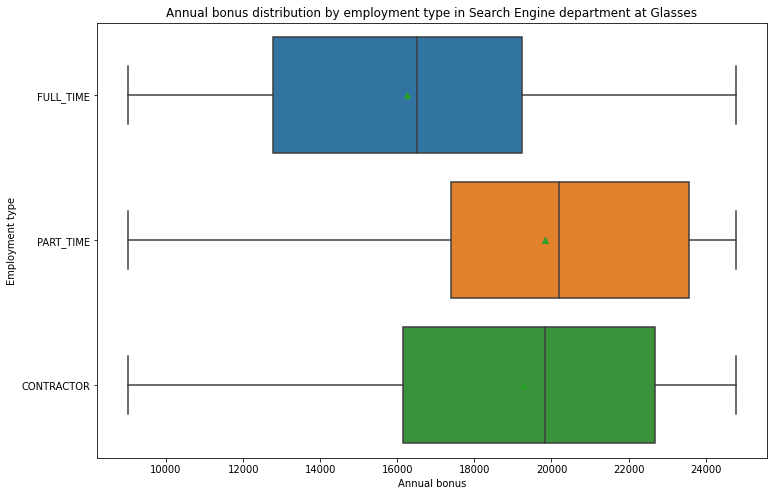

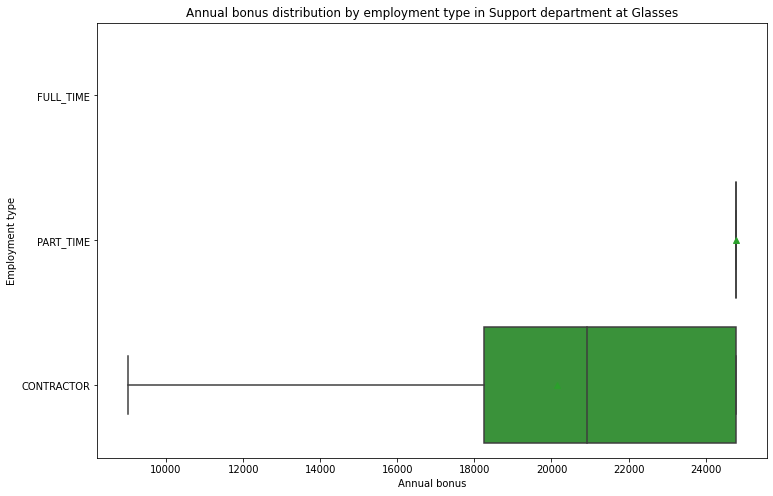

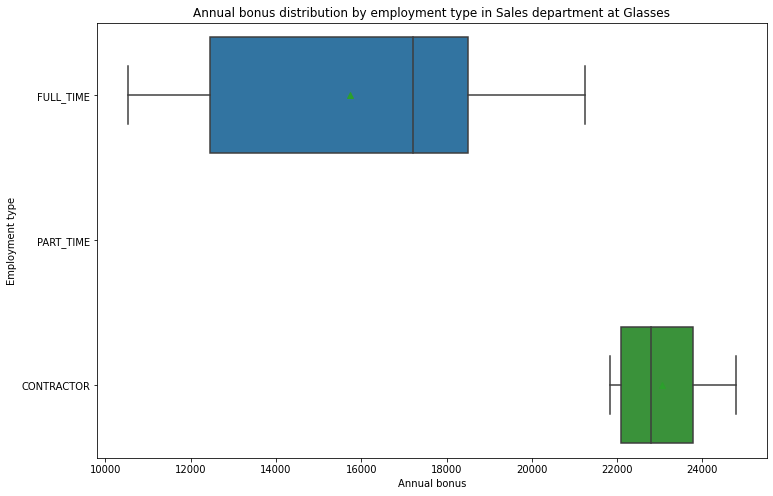

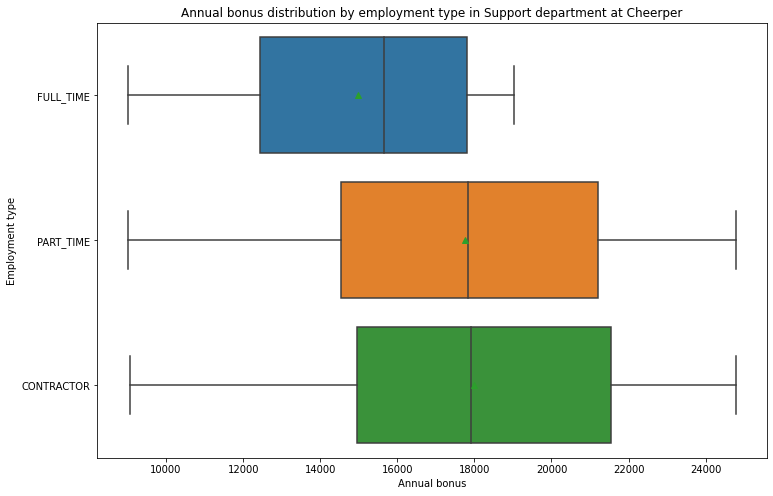

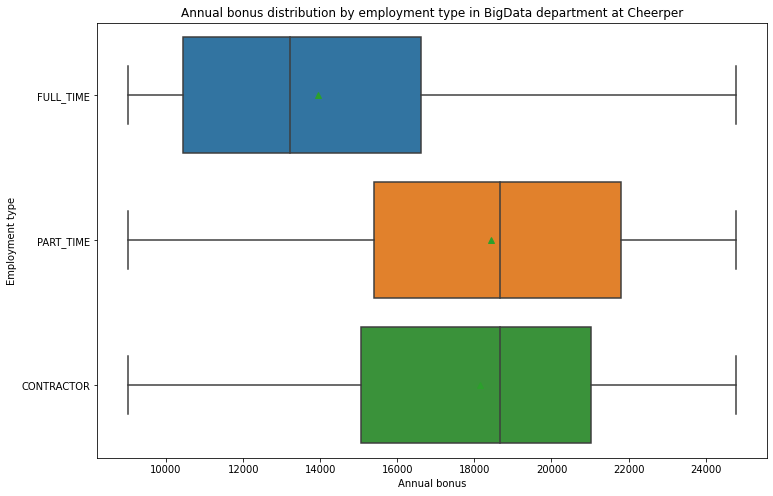

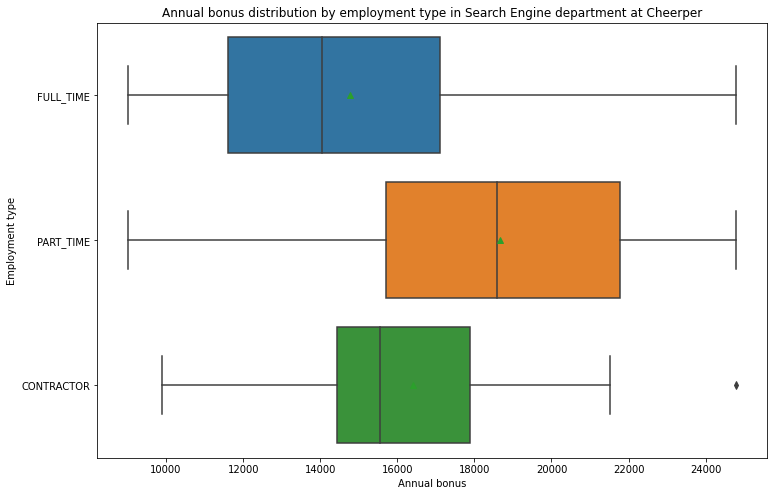

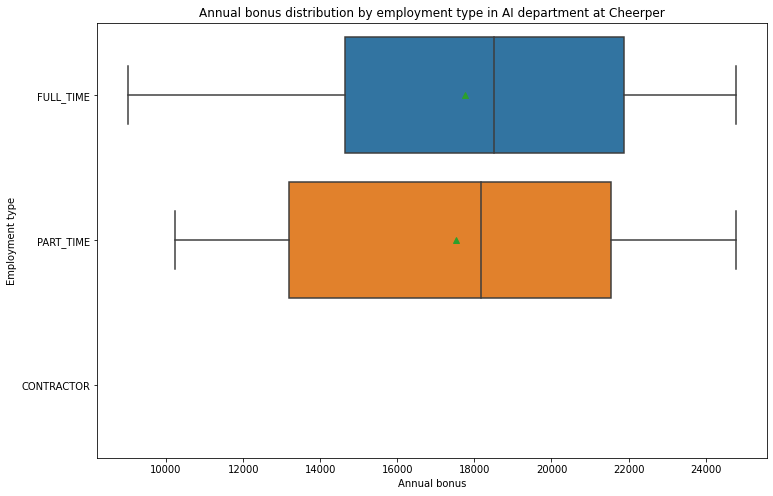

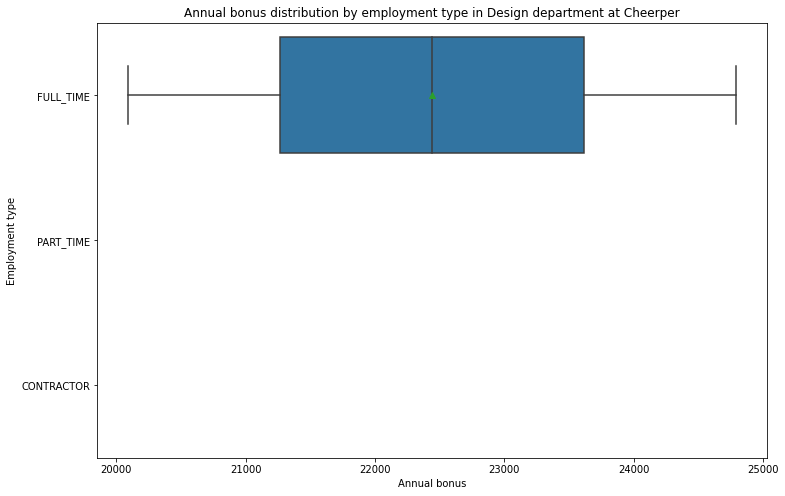

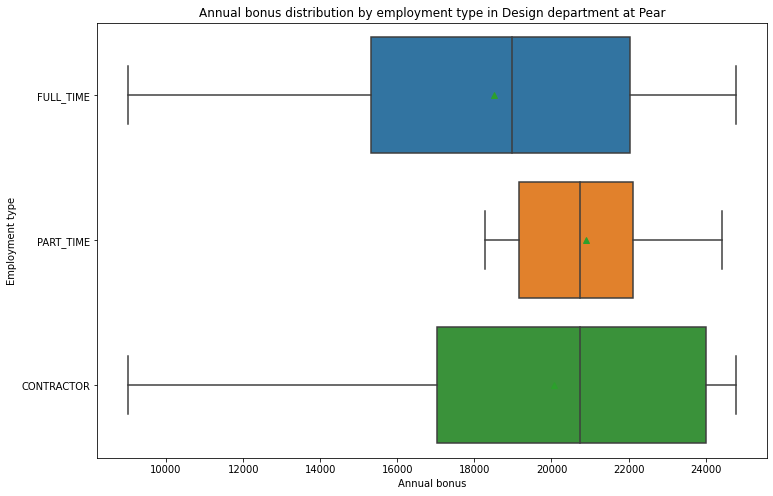

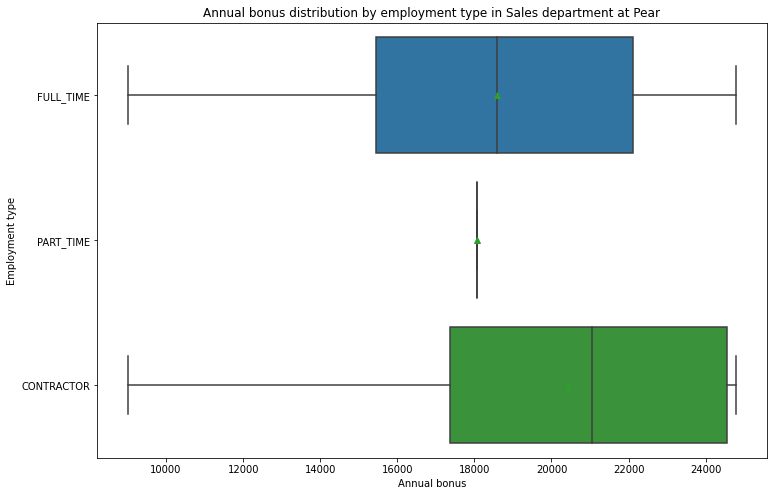

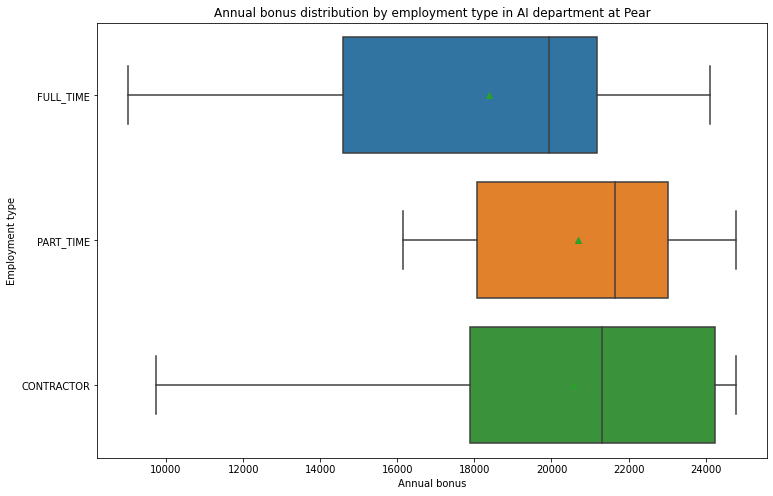

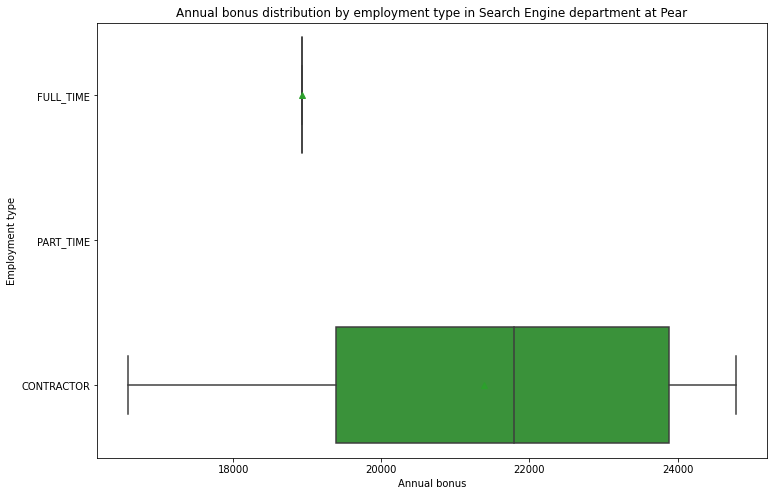

In [28]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,department,employment_type,annual_bonus FROM data;''',connect)
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig, ax = plt.subplots(figsize=(12,8))
        sns.boxplot(data=d, x="annual_bonus", y="employment_type", order = ['FULL_TIME','PART_TIME', 'CONTRACTOR'], showmeans=True).set(title='Annual bonus distribution by employment type in ' + department + ' department at ' + company, xlabel='Annual bonus', ylabel='Employment type')
        plt.show()

### Minimum, average and maximum salary according to previous years of experience

In [29]:
res = pd.read_sql(
'''
SELECT
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary,
    MAX(salary) AS max_salary
FROM data
GROUP BY prior_years_experience
ORDER BY prior_years_experience
''',connect)
res

,prior_years_experience,total_employees,min_salary,avg_salary,max_salary
0,1,1289,40000.0,88637.618570,153000.0
1,2,1341,40000.0,88196.100564,153000.0
2,3,1278,40000.0,85345.542719,153000.0
3,4,777,40000.0,87104.668823,153000.0
4,5,315,40000.0,84355.792308,153000.0


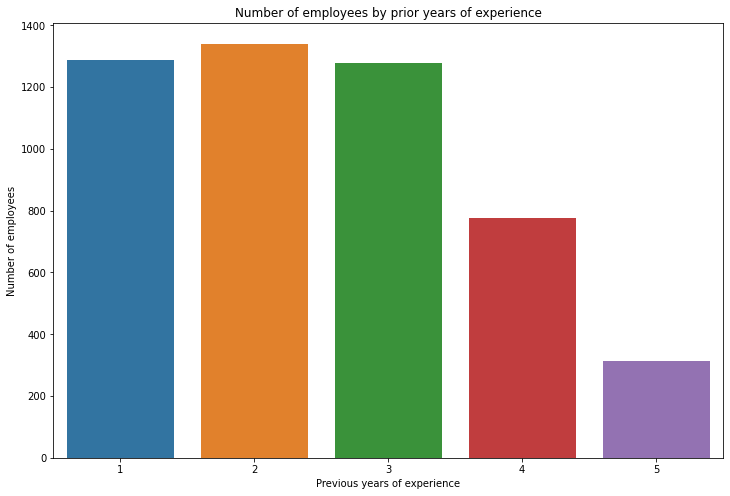

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=res,x='prior_years_experience',y='total_employees').set(title='Number of employees by prior years of experience', xlabel='Previous years of experience', ylabel='Number of employees')
plt.show()

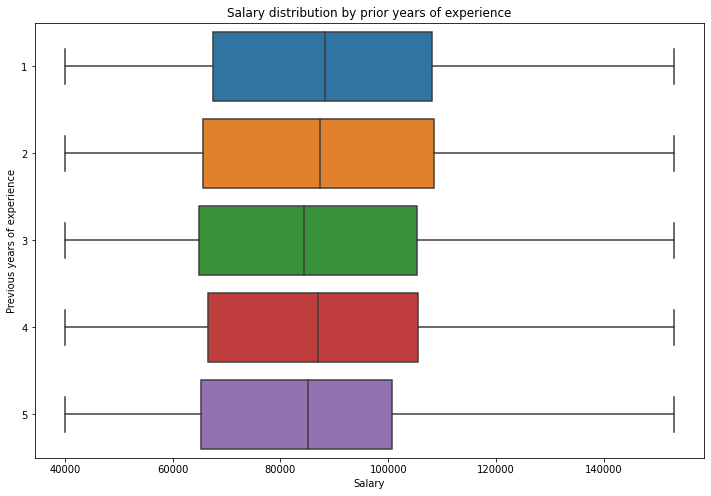

In [31]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT prior_years_experience,salary FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=res, x="salary", y="prior_years_experience",order=['1','2','3','4','5']).set(title='Salary distribution by prior years of experience', xlabel='Salary', ylabel='Previous years of experience')
plt.show()

### Minimum, average and maximum salary according to previous years of experience and company

In [32]:
res = pd.read_sql(
'''
SELECT
    company,
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary,
    MAX(salary) AS max_salary
FROM data
GROUP BY company,prior_years_experience
ORDER BY company,prior_years_experience
''',connect)
res

,company,prior_years_experience,total_employees,min_salary,avg_salary,max_salary
0,Cheerper,1,269,40000.0,76119.262370,153000.000000
1,Cheerper,2,374,40000.0,75786.902556,153000.000000
2,Cheerper,3,407,40000.0,74072.334307,149578.868595
3,Cheerper,4,253,40000.0,76563.070583,153000.000000
4,Cheerper,5,137,40000.0,75856.211311,140398.117743
5,Glasses,1,608,40000.0,87076.352923,153000.000000
6,Glasses,2,632,40000.0,88090.233036,153000.000000
7,Glasses,3,604,40000.0,86889.640852,153000.000000
8,Glasses,4,382,40000.0,89527.441216,153000.000000
9,Glasses,5,143,40000.0,88433.436219,153000.000000


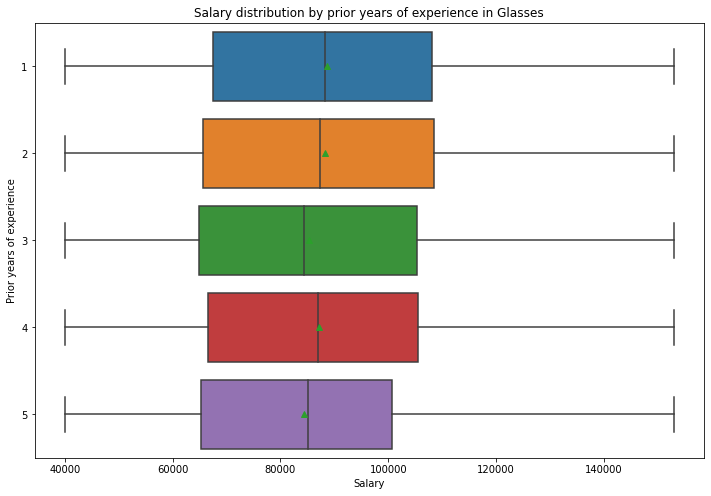

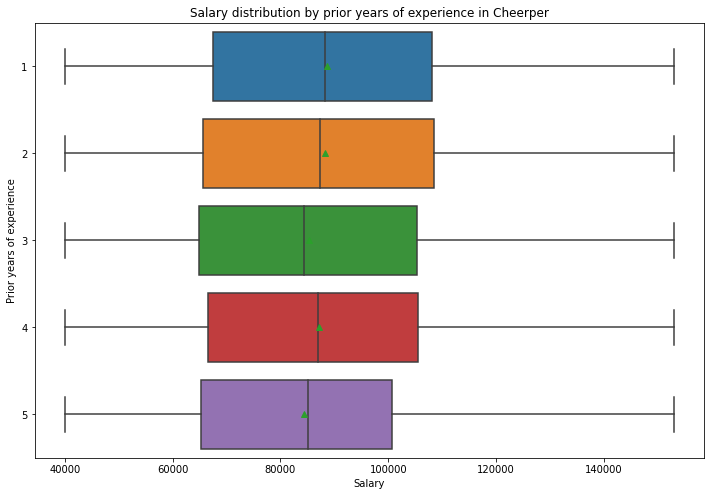

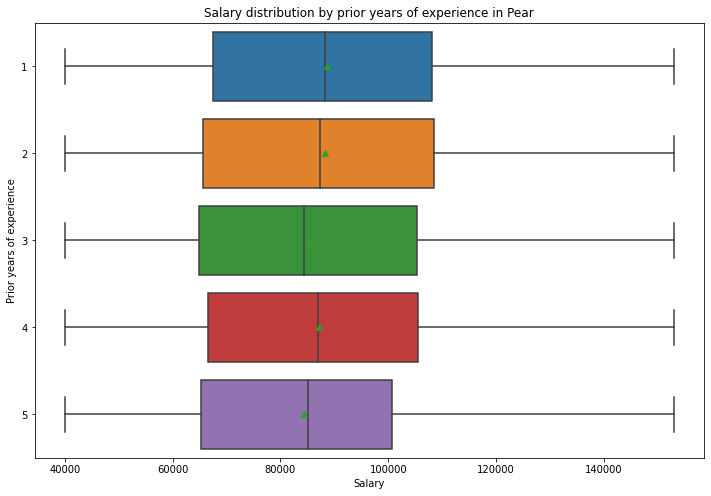

In [33]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,prior_years_experience,salary FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data=res, x="salary", y="prior_years_experience",order=['1','2','3','4','5'], showmeans=True).set(title='Salary distribution by prior years of experience in ' + company, xlabel='Salary', ylabel='Prior years of experience')
    plt.show()

### Minimum, average and maximum salary according to previous years of experience, company and department

In [34]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(salary) AS min_salary,
    AVG(salary) AS avg_salary,
    MAX(salary) AS max_salary
FROM data
GROUP BY company,department,prior_years_experience
ORDER BY company,department,prior_years_experience
''',connect)
res

,company,department,prior_years_experience,total_employees,min_salary,avg_salary,max_salary
0,Cheerper,AI,1,9,55784.902664,121569.462148,153000.000000
1,Cheerper,AI,2,7,76787.329734,95836.175219,111804.350311
2,Cheerper,AI,3,1,115974.944183,115974.944183,115974.944183
3,Cheerper,AI,4,3,125426.242389,141594.960424,153000.000000
4,Cheerper,AI,5,1,136677.646662,136677.646662,136677.646662
...,...,...,...,...,...,...,...
66,Pear,Search Engine,1,1,65767.753631,65767.753631,65767.753631
67,Pear,Search Engine,2,3,46153.797263,51274.495008,59741.572844
68,Pear,Search Engine,3,2,40000.000000,53351.508713,66703.017427
69,Pear,Search Engine,4,1,64917.200547,64917.200547,64917.200547


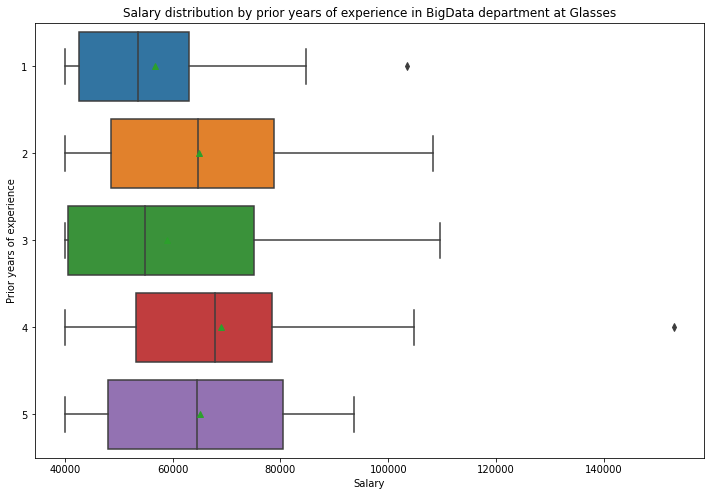

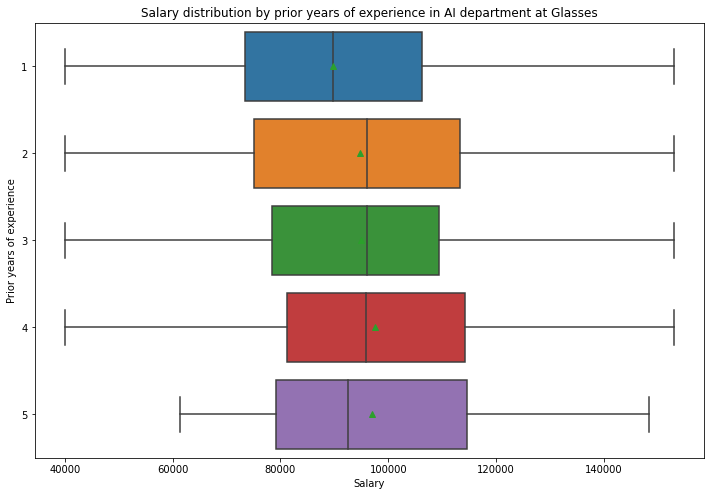

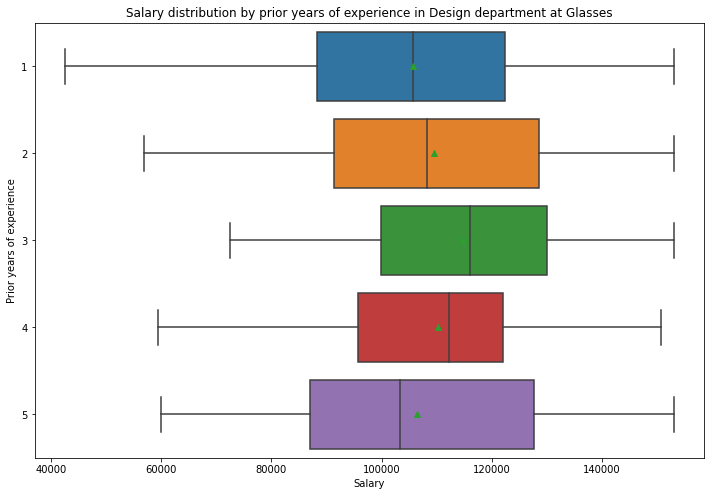

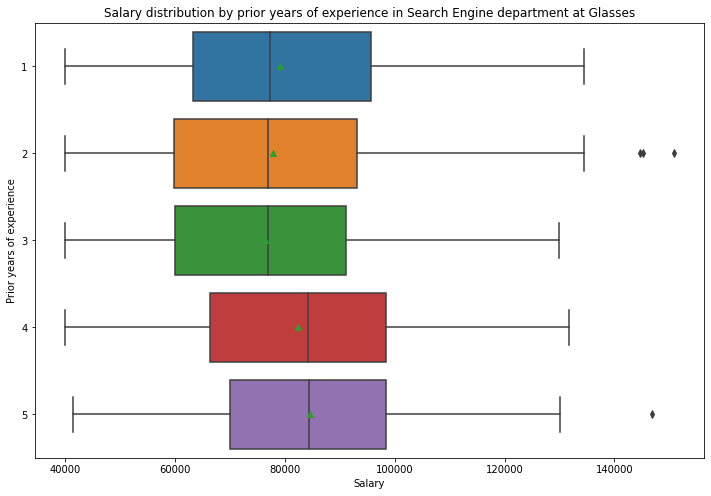

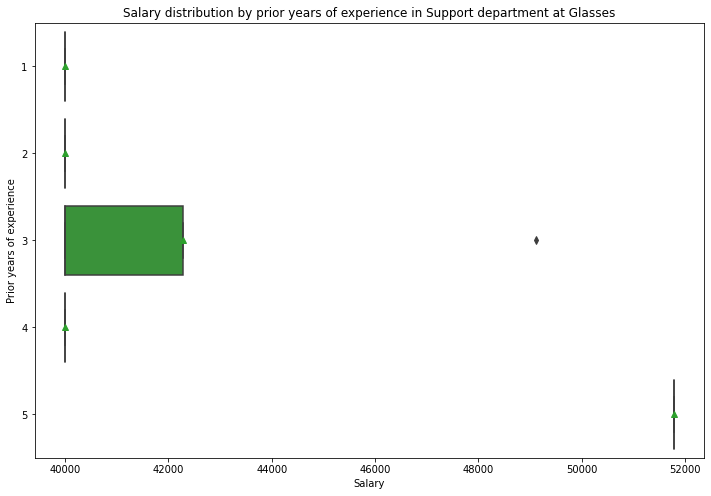

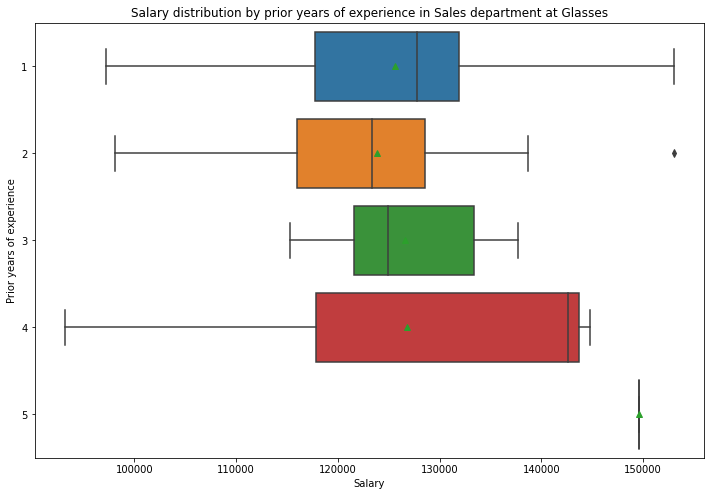

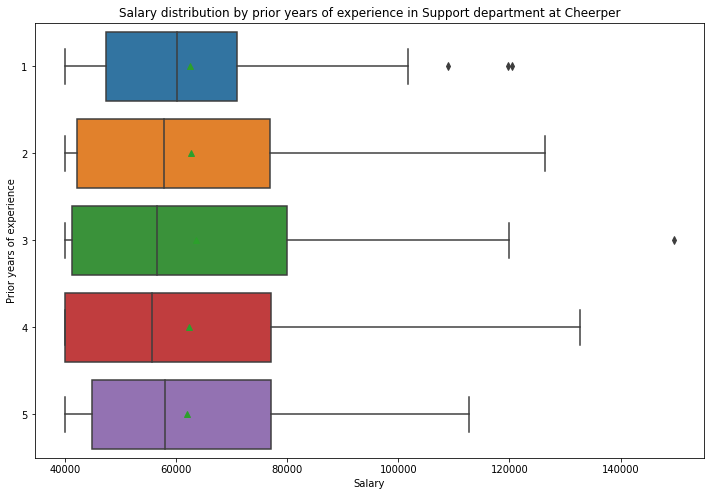

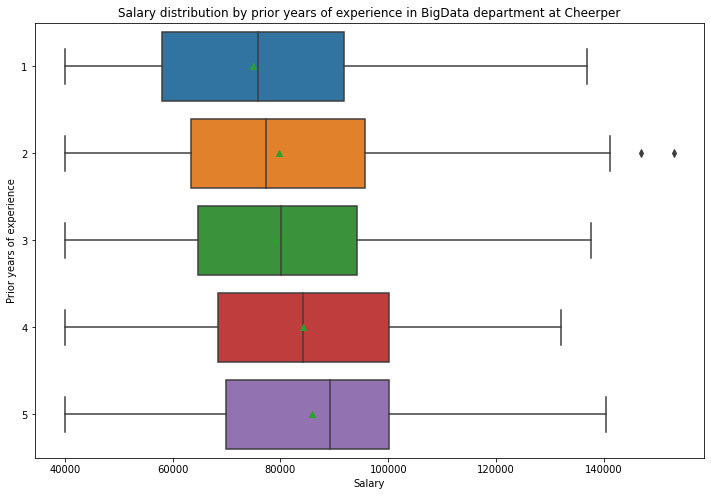

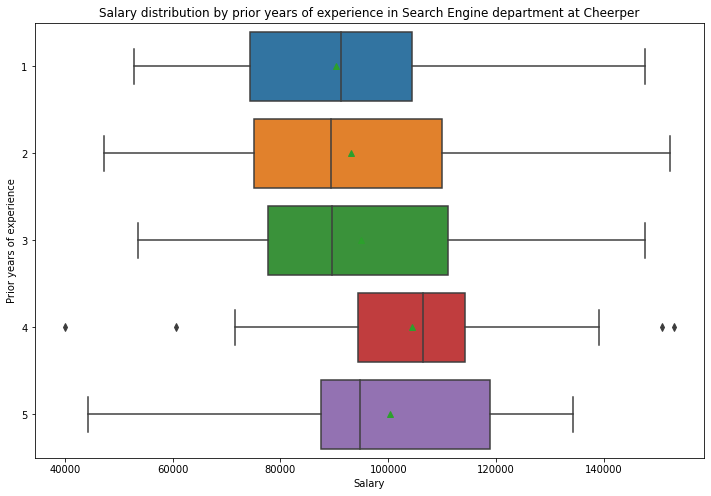

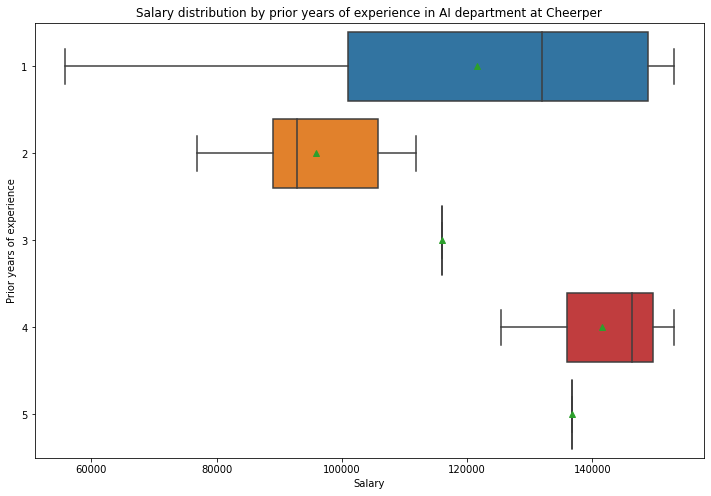

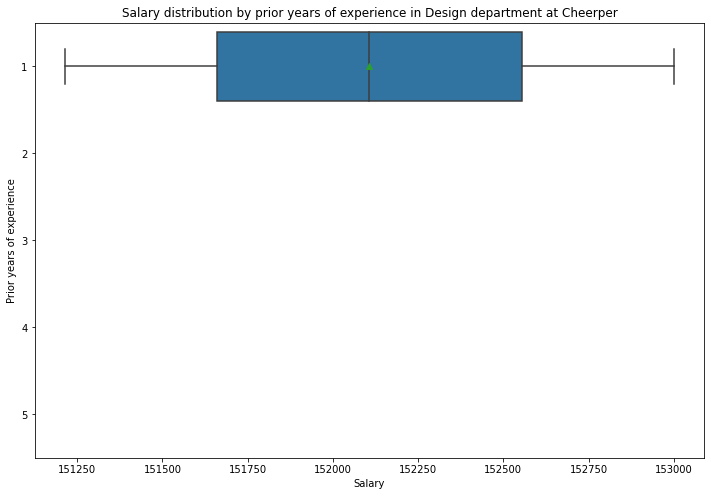

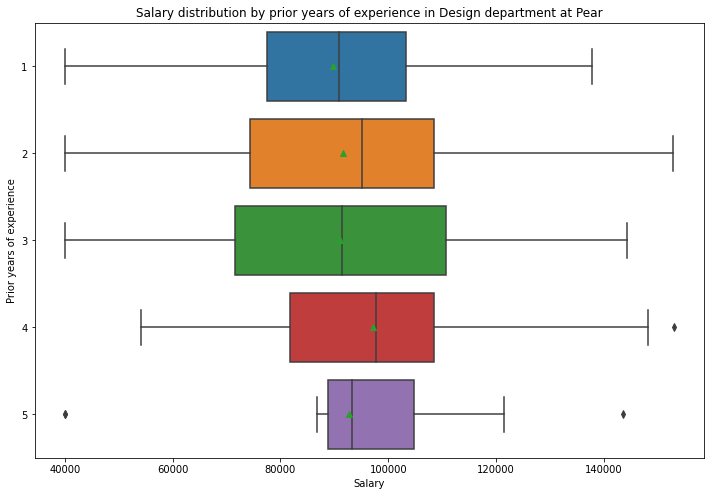

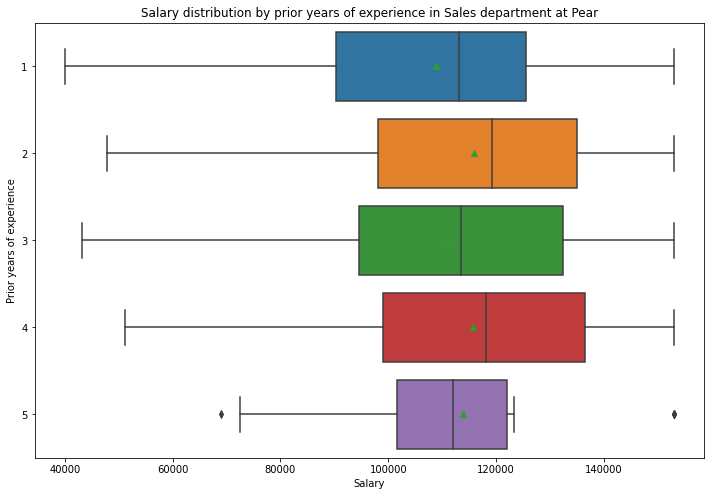

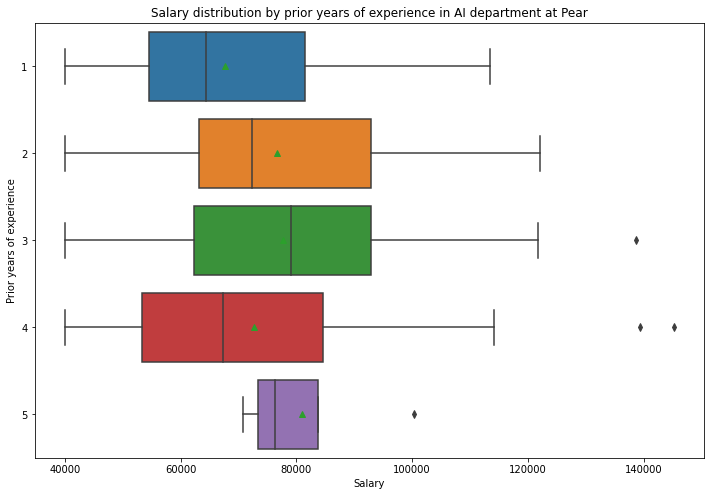

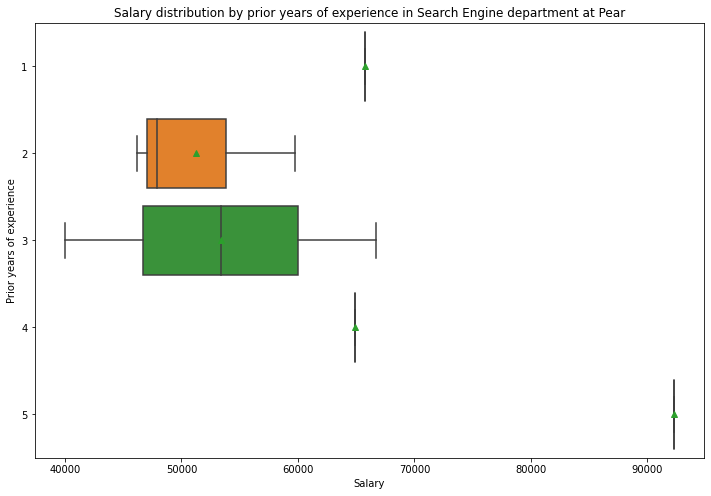

In [35]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,department,prior_years_experience,salary FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig, ax = plt.subplots(figsize=(12,8))
        sns.boxplot(data=d, x="salary", y="prior_years_experience", order = ['1','2', '3','4','5'], showmeans=True).set(title='Salary distribution by prior years of experience in ' + department + ' department at ' + company, xlabel='Salary', ylabel='Prior years of experience')
        plt.show()

### How many employees does each company have earning their maximum salary?

In [36]:
res = pd.read_sql(
'''
WITH max_salary AS
    (SELECT
        company,
        MAX(salary) AS max_salary
    FROM data
    GROUP BY company
    )
SELECT
    d.company,
    ms.max_salary,
    COUNT(*) AS count
FROM data AS d
INNER JOIN max_salary AS ms
ON d.company=ms.company
WHERE d.salary=ms.max_salary
GROUP BY d.company
''',connect)
res

,company,max_salary,count
0,Cheerper,153000.0,5
1,Glasses,153000.0,29
2,Pear,153000.0,32


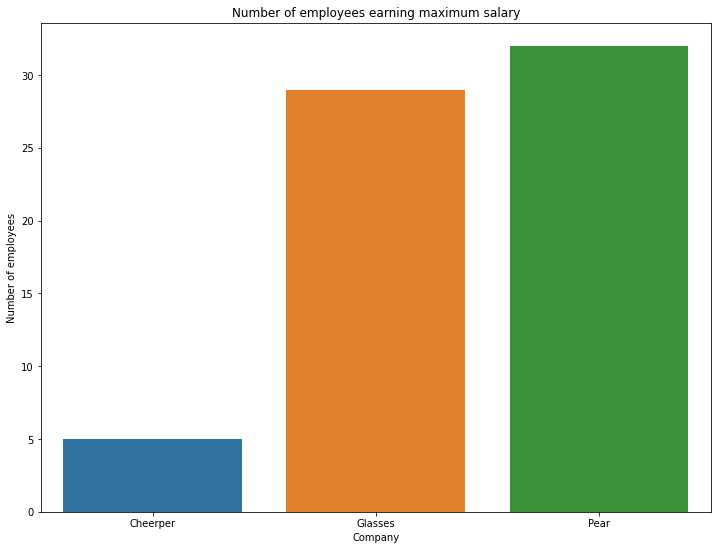

In [37]:
fig,ax = plt.subplots(figsize=(12,9))
rel = sns.barplot(data=res,x='company',y='count').set(title='Number of employees earning maximum salary',xlabel='Company',ylabel='Number of employees')
plt.show()

### How many employees does each company have earning their minimum salary?

In [38]:
res = pd.read_sql(
'''
WITH min_salary AS
    (SELECT
        company,
        MIN(salary) AS min_salary
    FROM data
    GROUP BY company
    )
SELECT
    d.company,
    ms.min_salary,
    COUNT(*) AS count
FROM data AS d
INNER JOIN min_salary AS ms
ON d.company=ms.company
WHERE d.salary=ms.min_salary
GROUP BY d.company
''',connect)
res

,company,min_salary,count
0,Cheerper,40000.0,176
1,Glasses,40000.0,104
2,Pear,40000.0,21


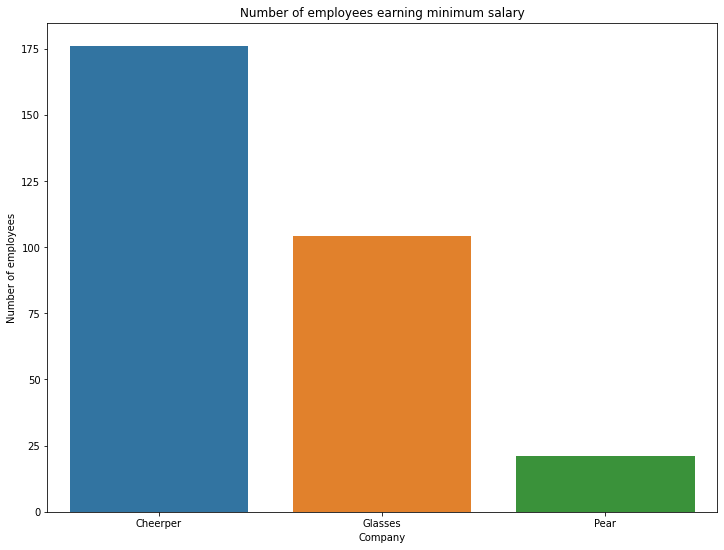

In [39]:
fig,ax = plt.subplots(figsize=(12,9))
rel = sns.barplot(data=res,x='company',y='count').set(title='Number of employees earning minimum salary',xlabel='Company',ylabel='Number of employees')
plt.show()

### Minimum, average and maximum bonus according to previous years of experience

In [40]:
res = pd.read_sql(
'''
SELECT
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus,
    MAX(annual_bonus) AS max_bonus
FROM data
GROUP BY prior_years_experience
ORDER BY prior_years_experience
''',connect)
res

,prior_years_experience,total_employees,min_bonus,avg_bonus,max_bonus
0,1,1289,13168.057313,22615.288251,24792.910000
1,2,1341,9035.552542,19726.785612,24792.910000
2,3,1278,9000.000000,17461.631581,24792.910000
3,4,777,9000.000000,14673.115291,24199.462081
4,5,315,9000.000000,11719.489458,19361.613582


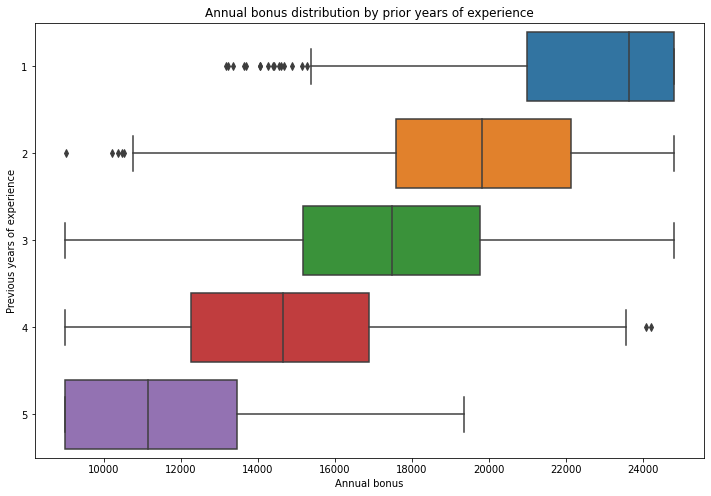

In [41]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT prior_years_experience,annual_bonus FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=res, x="annual_bonus", y="prior_years_experience",order=['1','2','3','4','5']).set(title='Annual bonus distribution by prior years of experience', xlabel='Annual bonus', ylabel='Previous years of experience')
plt.show()

### Minimum, average and maximum bonus according to previous years of experience and company

In [42]:
res = pd.read_sql(
'''
SELECT
    company,
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus,
    MAX(annual_bonus) AS max_bonus
FROM data
GROUP BY company,prior_years_experience
ORDER BY company,prior_years_experience
''',connect)
res

,company,prior_years_experience,total_employees,min_bonus,avg_bonus,max_bonus
0,Cheerper,1,269,13234.425559,22352.887304,24792.910000
1,Cheerper,2,374,9035.552542,19403.661923,24792.910000
2,Cheerper,3,407,9000.000000,17313.982269,24792.910000
3,Cheerper,4,253,9000.000000,14472.932162,24060.322166
4,Cheerper,5,137,9000.000000,11528.271100,19029.804861
5,Glasses,1,608,13168.057313,22600.259253,24792.910000
6,Glasses,2,632,10542.519767,19823.309695,24792.910000
7,Glasses,3,604,9000.000000,17572.951846,24792.910000
8,Glasses,4,382,9000.000000,14812.726327,24199.462081
9,Glasses,5,143,9000.000000,11864.406250,19361.613582


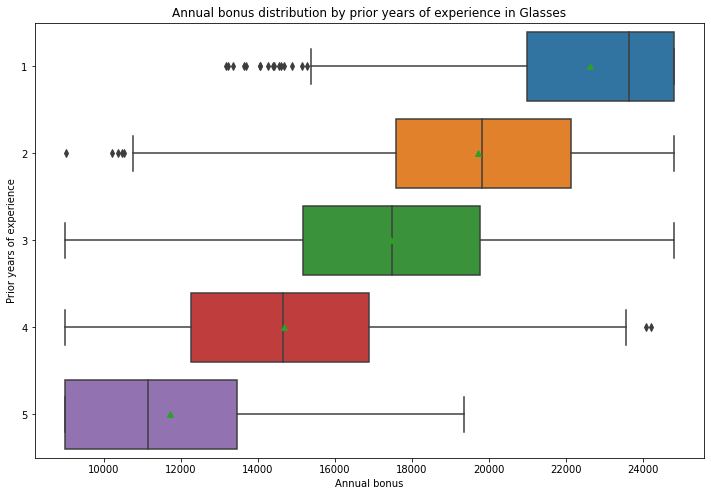

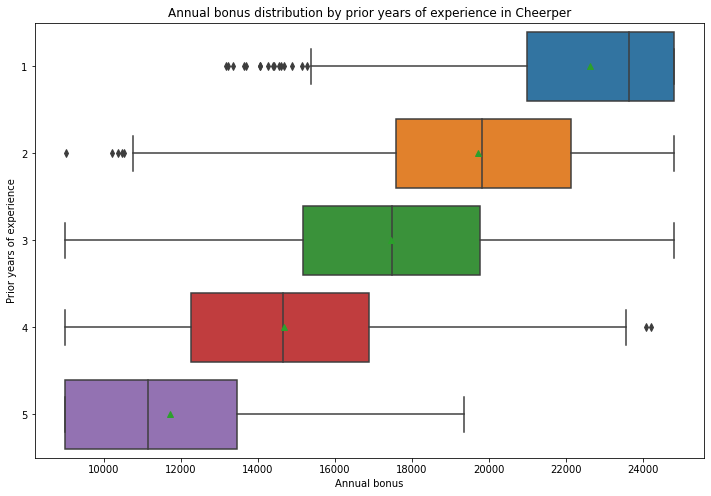

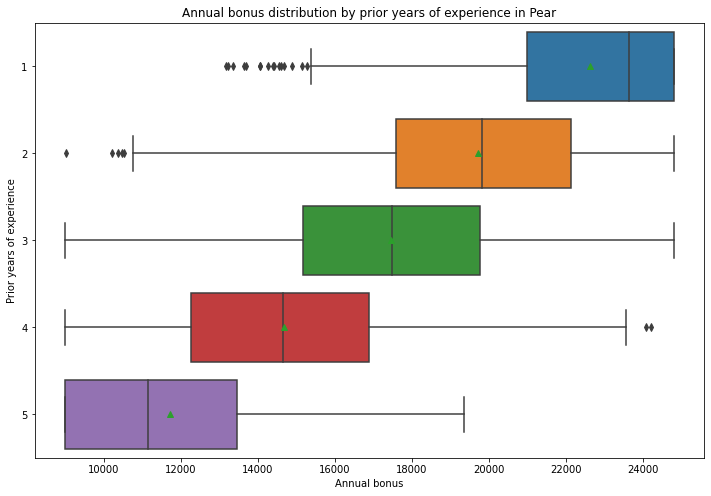

In [43]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,prior_years_experience,annual_bonus FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data=res, x="annual_bonus", y="prior_years_experience",order=['1','2','3','4','5'], showmeans=True).set(title='Annual bonus distribution by prior years of experience in ' + company, xlabel='Annual bonus', ylabel='Prior years of experience')
    plt.show()

### Minimum, average and maximum bonus according to previous years of experience, company and department

In [44]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    prior_years_experience,
    COUNT(*) AS total_employees,
    MIN(annual_bonus) AS min_bonus,
    AVG(annual_bonus) AS avg_bonus,
    MAX(annual_bonus) AS max_bonus
FROM data
GROUP BY company,department,prior_years_experience
ORDER BY company,department,prior_years_experience
''',connect)
res

,company,department,prior_years_experience,total_employees,min_bonus,avg_bonus,max_bonus
0,Cheerper,AI,1,9,13684.861778,21926.399878,24792.910000
1,Cheerper,AI,2,7,10221.591312,14739.679420,18726.929335
2,Cheerper,AI,3,1,16875.446199,16875.446199,16875.446199
3,Cheerper,AI,4,3,10904.990605,14994.760011,18470.917888
4,Cheerper,AI,5,1,9000.000000,9000.000000,9000.000000
...,...,...,...,...,...,...,...
66,Pear,Search Engine,1,1,24792.910000,24792.910000,24792.910000
67,Pear,Search Engine,2,3,18646.661567,21741.839225,24792.910000
68,Pear,Search Engine,3,2,16570.307090,18354.111224,20137.915358
69,Pear,Search Engine,4,1,22969.250207,22969.250207,22969.250207


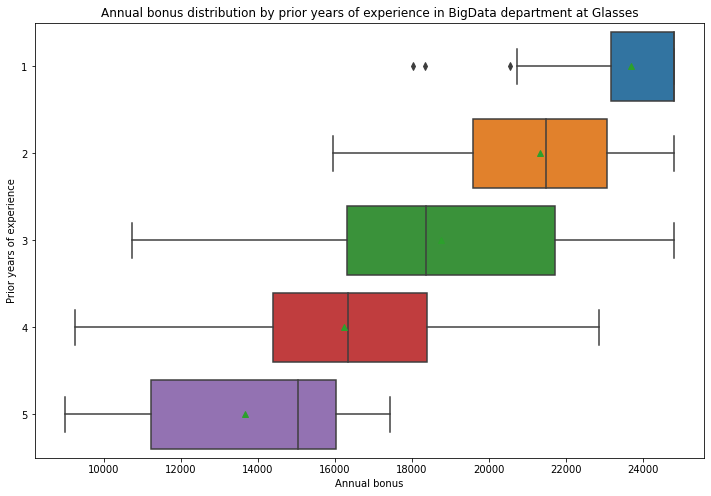

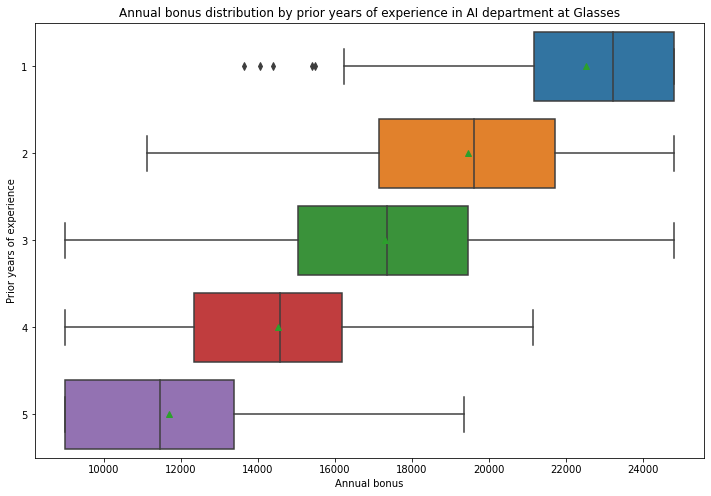

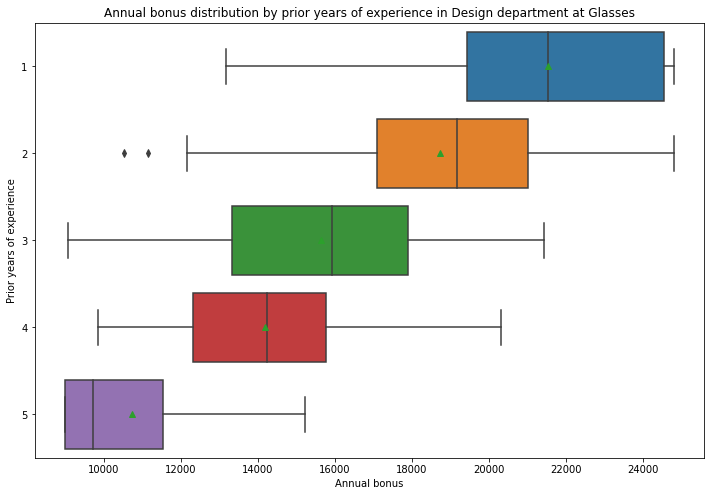

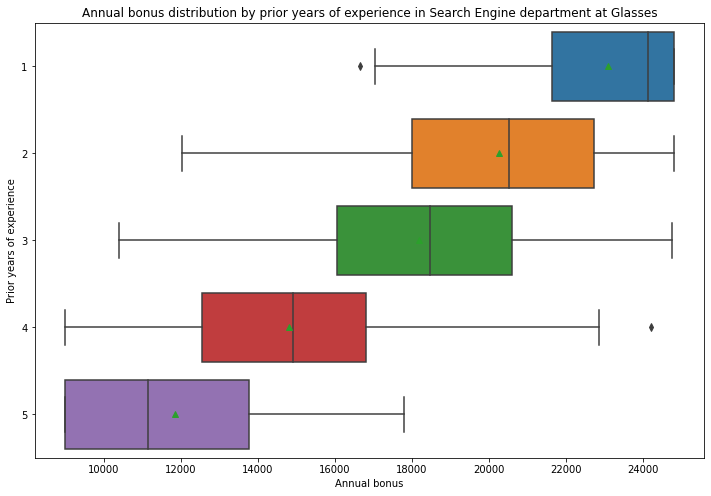

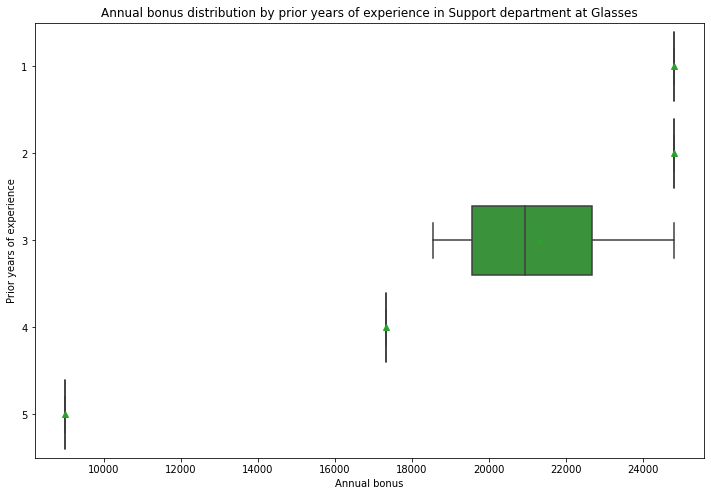

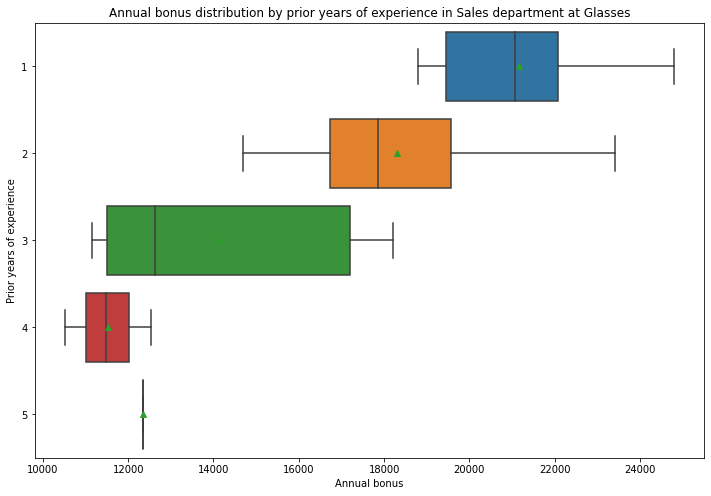

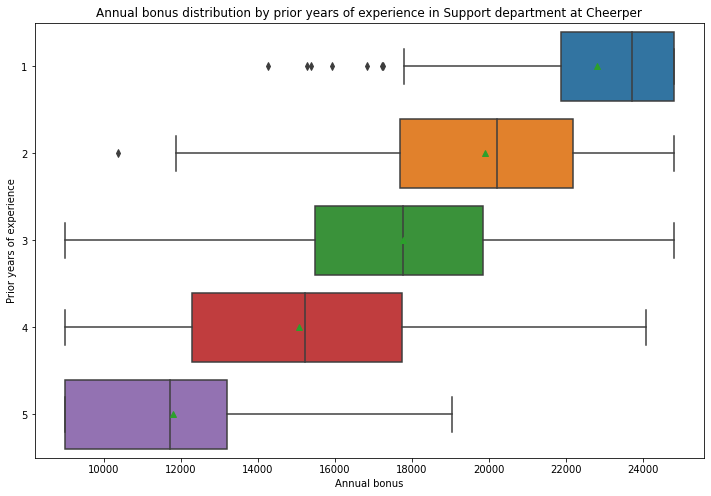

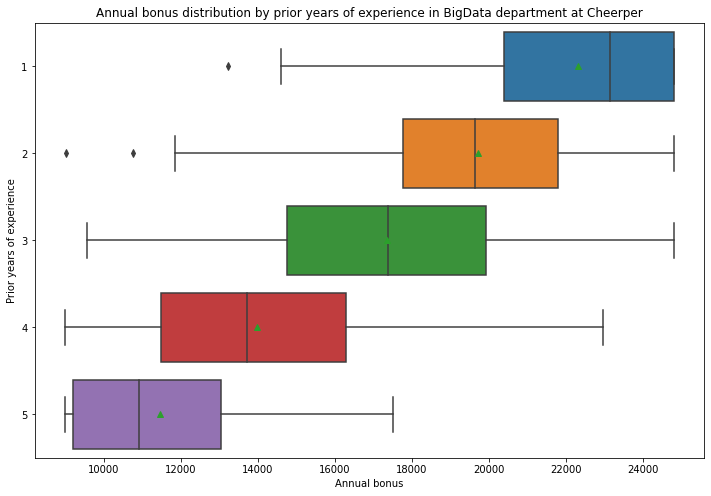

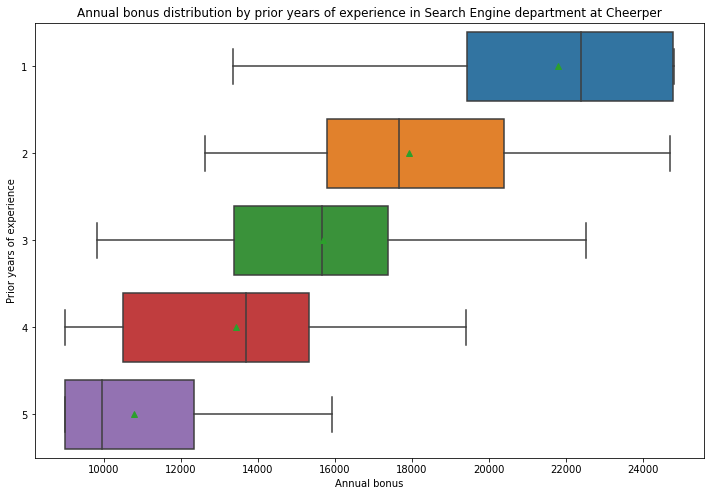

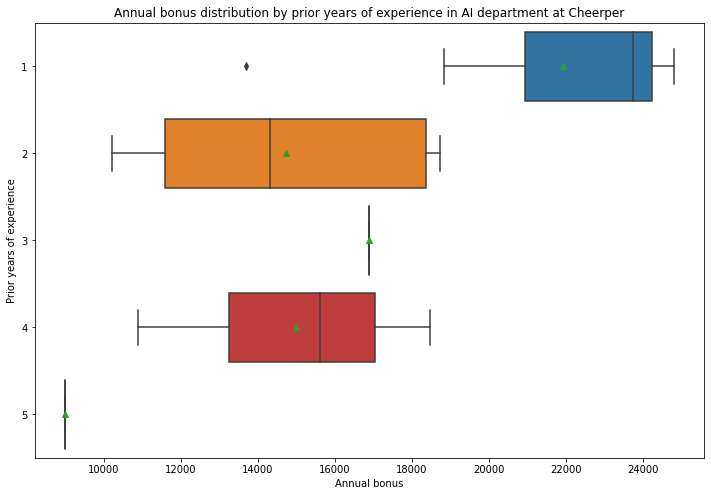

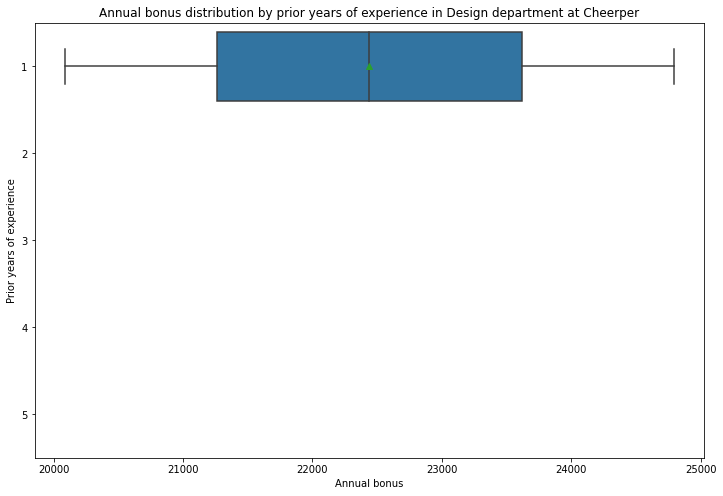

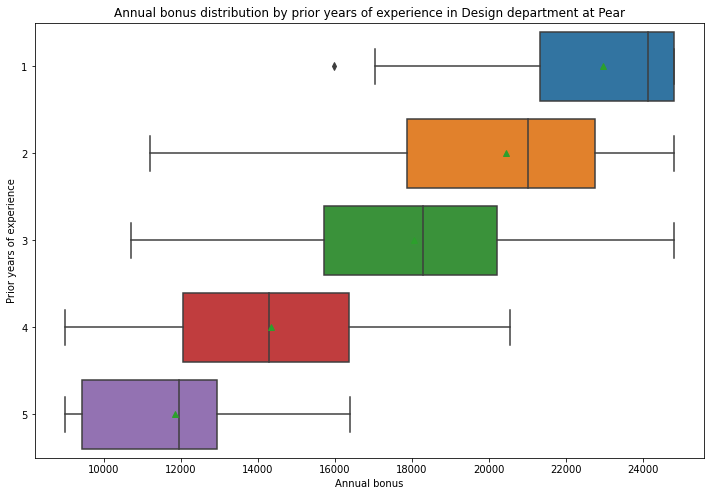

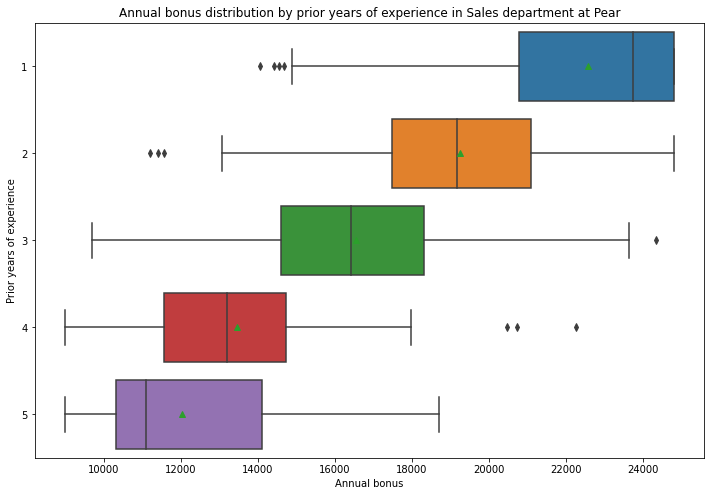

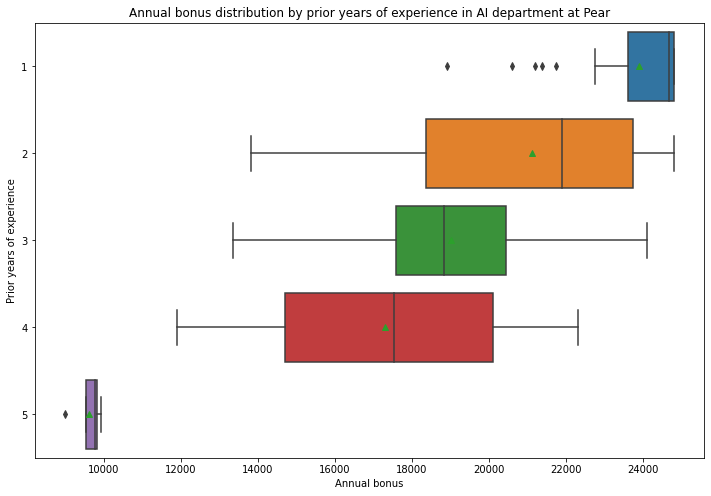

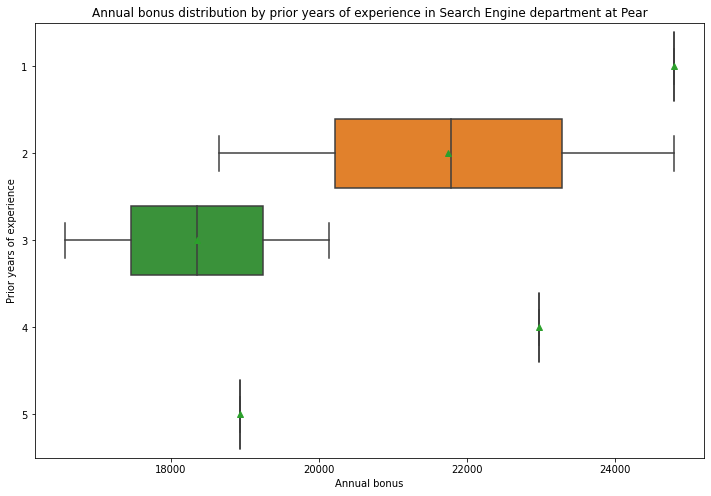

In [45]:
## This is nice to plot using seaborn boxplot
res = pd.read_sql('''SELECT company,department,prior_years_experience,annual_bonus FROM data;''',connect)
res['prior_years_experience'] = res['prior_years_experience'].astype(str)
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig, ax = plt.subplots(figsize=(12,8))
        sns.boxplot(data=d, x="annual_bonus", y="prior_years_experience", order = ['1','2', '3','4','5'], showmeans=True).set(title='Annual bonus distribution by prior years of experience in ' + department + ' department at ' + company, xlabel='Annual bonus', ylabel='Prior years of experience')
        plt.show()

### How many employees does each company have earning their maximum bonus?

In [46]:
res = pd.read_sql(
'''
WITH max_bonus AS
    (SELECT
        company,
        MAX(annual_bonus) AS max_bonus
    FROM data
    GROUP BY company
    )
SELECT
    d.company,
    mb.max_bonus,
    COUNT(*) AS count
FROM data AS d
INNER JOIN max_bonus AS mb
ON d.company=mb.company
WHERE d.annual_bonus=mb.max_bonus
GROUP BY d.company
''',connect)
res

,company,max_bonus,count
0,Cheerper,24792.91,121
1,Glasses,24792.91,280
2,Pear,24792.91,187


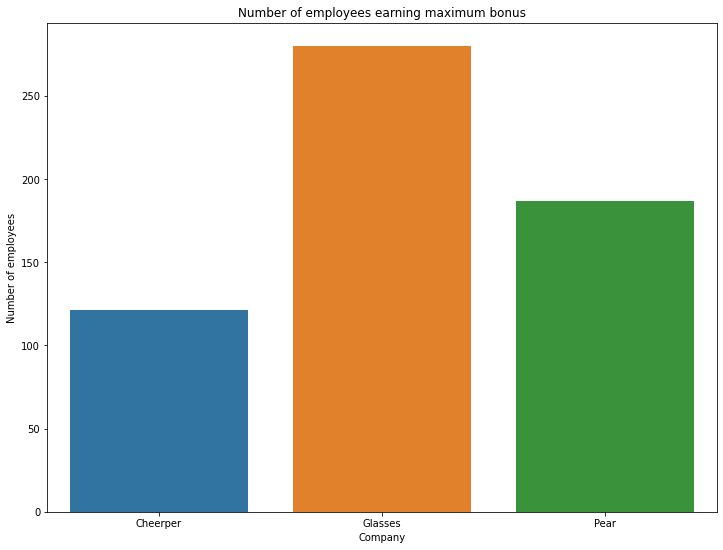

In [47]:
fig,ax = plt.subplots(figsize=(12,9))
rel = sns.barplot(data=res,x='company',y='count').set(title='Number of employees earning maximum bonus',xlabel='Company',ylabel='Number of employees')
plt.show()

### How many employees does each company have earning their minimum bonus?

In [48]:
res = pd.read_sql(
'''
WITH min_bonus AS
    (SELECT
        company,
        MIN(annual_bonus) AS min_bonus
    FROM data
    GROUP BY company
    )
SELECT
    d.company,
    mb.min_bonus,
    COUNT(*) AS count
FROM data AS d
INNER JOIN min_bonus AS mb
ON d.company=mb.company
WHERE d.annual_bonus=mb.min_bonus
GROUP BY d.company
''',connect)
res

,company,min_bonus,count
0,Cheerper,9000.0,54
1,Glasses,9000.0,55
2,Pear,9000.0,15


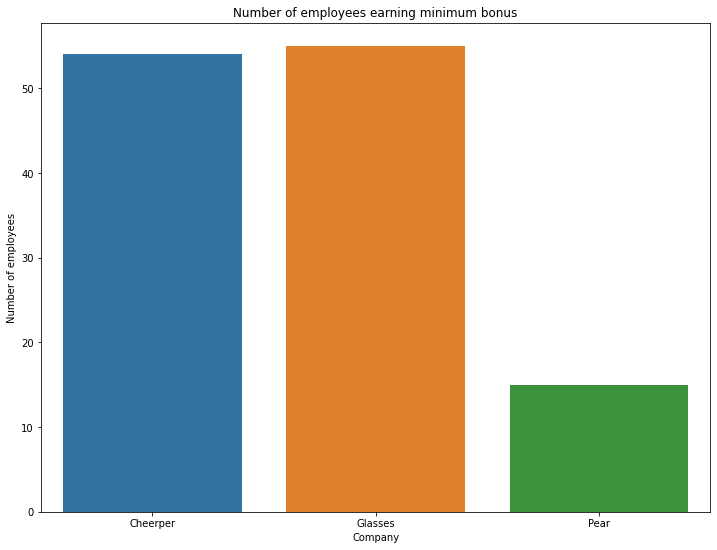

In [49]:
fig,ax = plt.subplots(figsize=(12,9))
rel = sns.barplot(data=res,x='company',y='count').set(title='Number of employees earning minimum bonus',xlabel='Company',ylabel='Number of employees')
plt.show()

### Dividing employee into age buckets and counting them

In [50]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    age_bucket,
    COUNT(*) AS count
FROM ages
GROUP BY age_bucket;
''',connect)
res

,age_bucket,count
0,26-30,778
1,31-35,1139
2,36-40,1316
3,41-45,1001
4,46-50,766


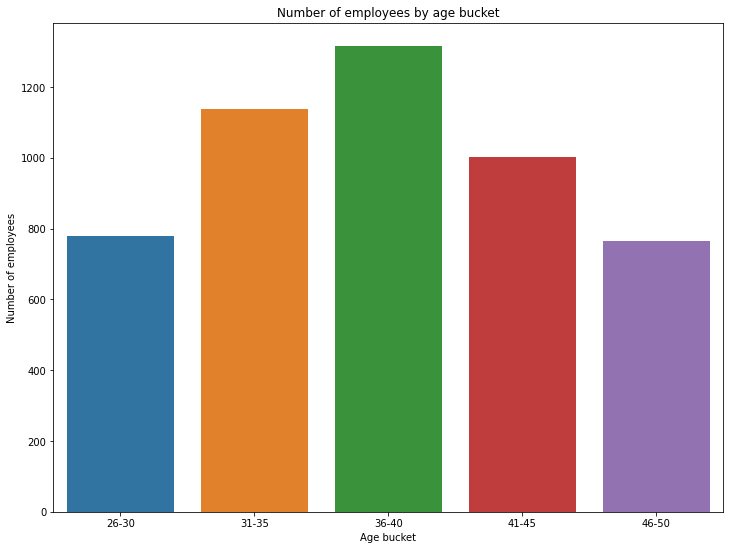

In [51]:
fig,ax = plt.subplots(figsize=(12,9))
rel = sns.barplot(data=res,x='age_bucket',y='count').set(title='Number of employees by age bucket',xlabel='Age bucket',ylabel='Number of employees')
plt.show()

### How many employees does each company have in each age bucket?

In [52]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    a.age_bucket,
    COUNT(*) AS count
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,a.age_bucket;
''',connect)
res

,company,age_bucket,count
0,Cheerper,26-30,202
1,Cheerper,31-35,322
2,Cheerper,36-40,380
3,Cheerper,41-45,303
4,Cheerper,46-50,233
5,Glasses,26-30,388
6,Glasses,31-35,537
7,Glasses,36-40,614
8,Glasses,41-45,483
9,Glasses,46-50,347


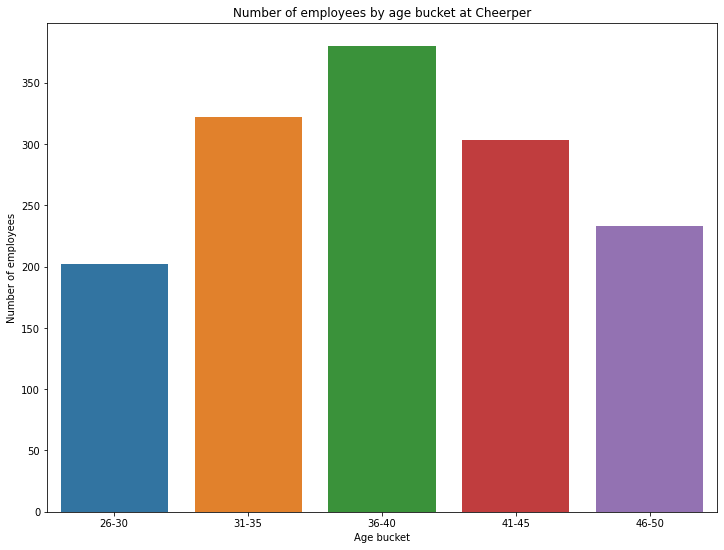

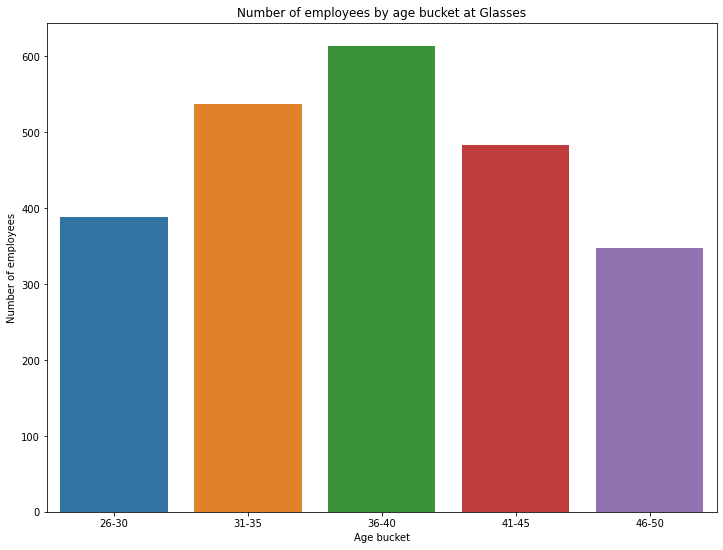

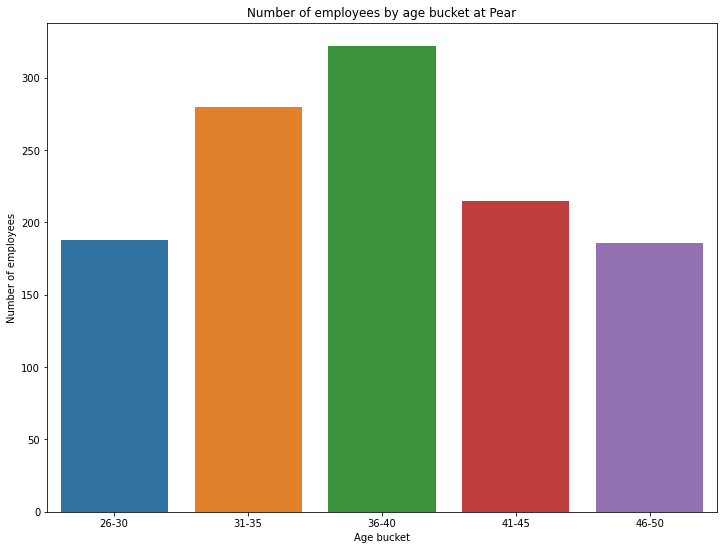

In [53]:
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig,ax = plt.subplots(figsize=(12,9))
    rel = sns.barplot(data=d,x='age_bucket',y='count',ci=None).set(title='Number of employees by age bucket at ' + company,xlabel='Age bucket',ylabel='Number of employees')
    plt.show()

### Employees by age bucket and department in each company

In [54]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    d.department,
    a.age_bucket,
    COUNT(*) AS count
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,d.department,a.age_bucket;
''',connect)
res

,company,department,age_bucket,count
0,Cheerper,AI,26-30,4
1,Cheerper,AI,31-35,2
2,Cheerper,AI,36-40,5
3,Cheerper,AI,41-45,6
4,Cheerper,AI,46-50,4
...,...,...,...,...
62,Pear,Sales,41-45,128
63,Pear,Sales,46-50,101
64,Pear,Search Engine,26-30,3
65,Pear,Search Engine,31-35,4


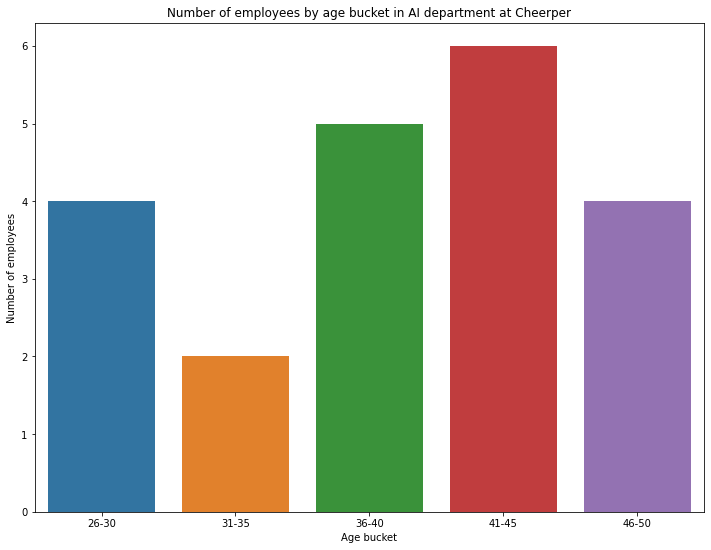

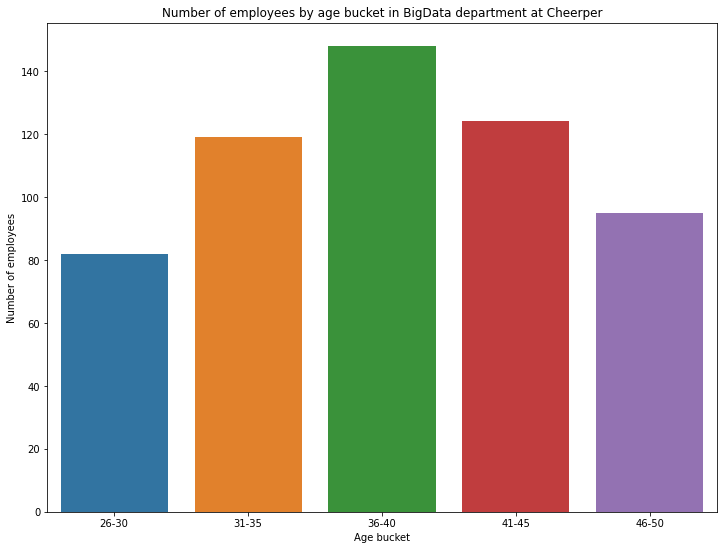

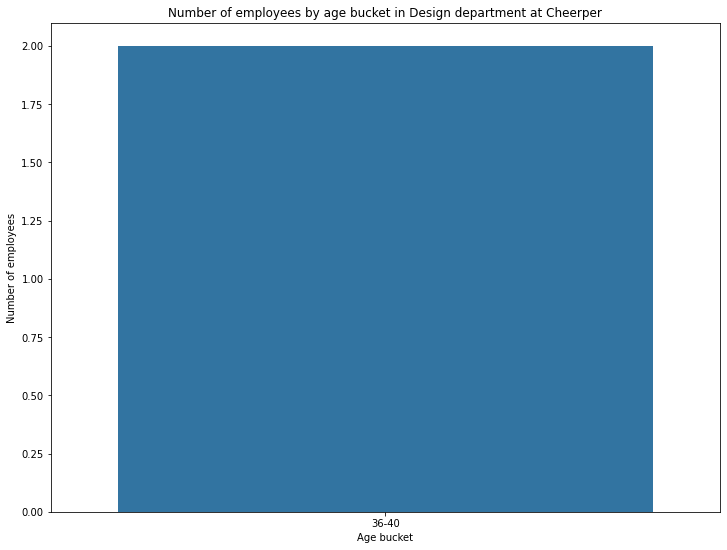

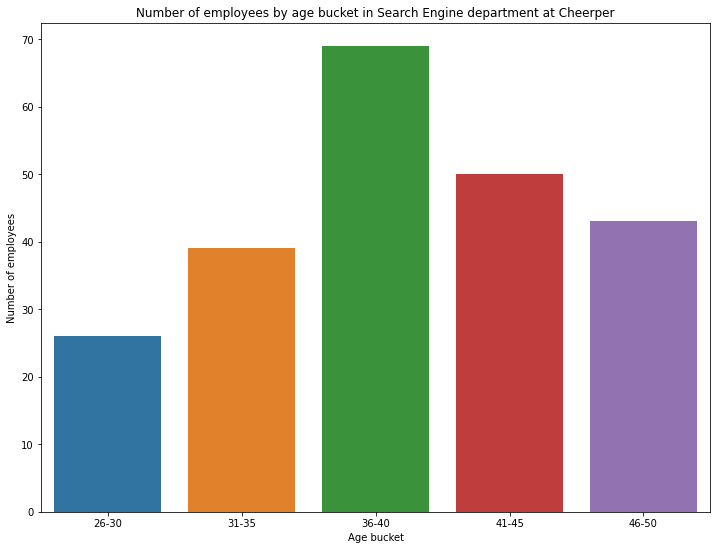

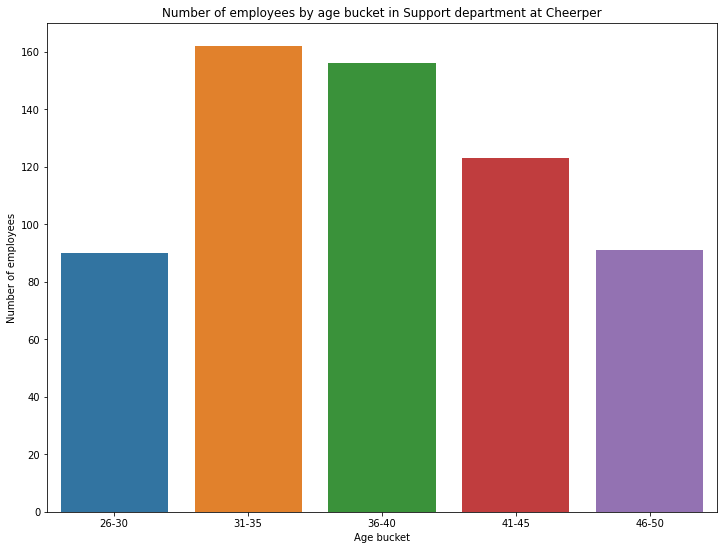

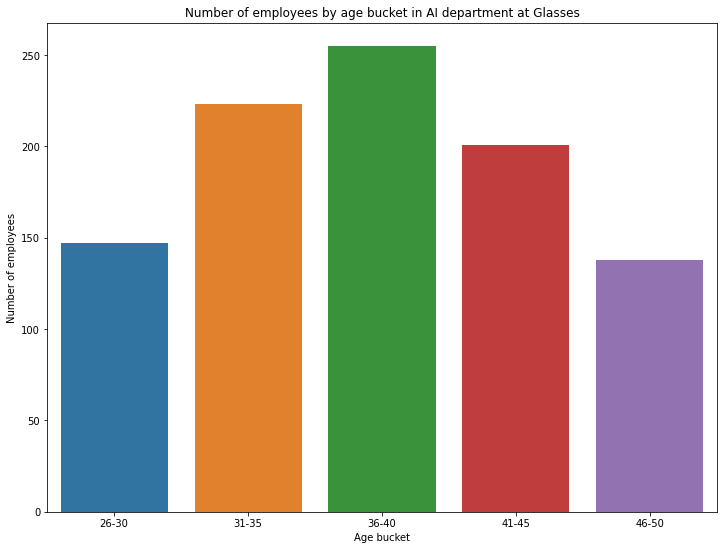

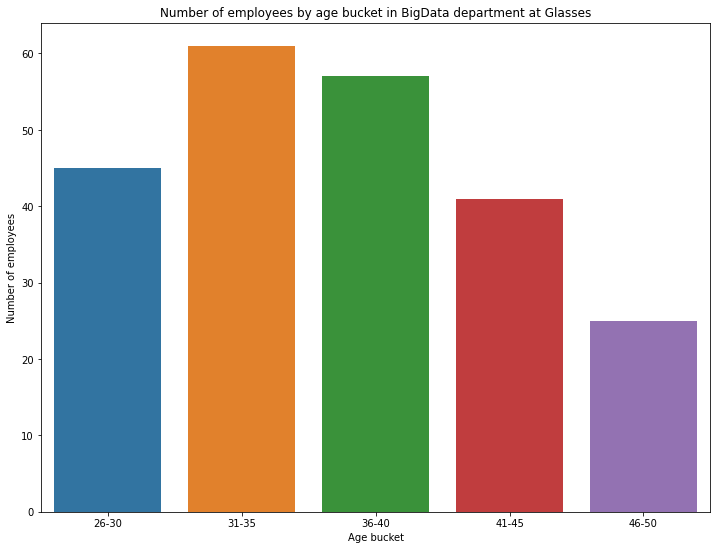

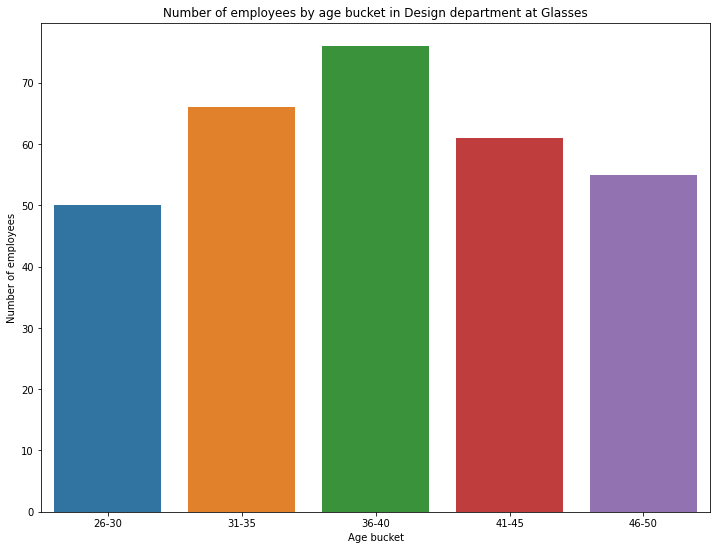

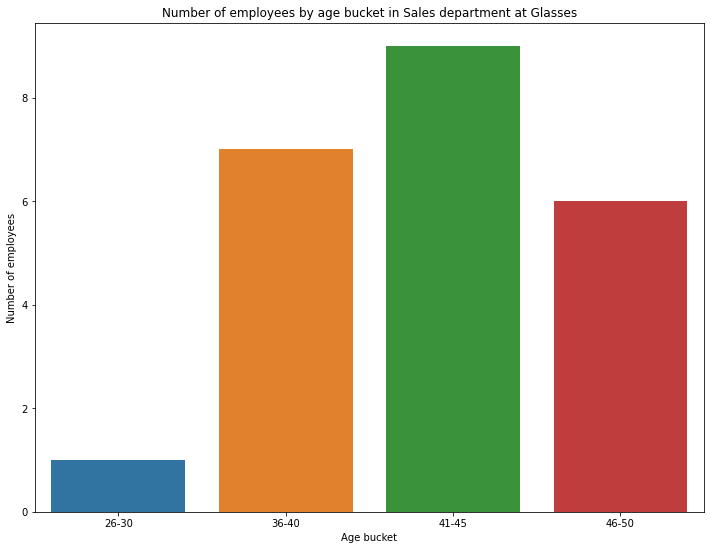

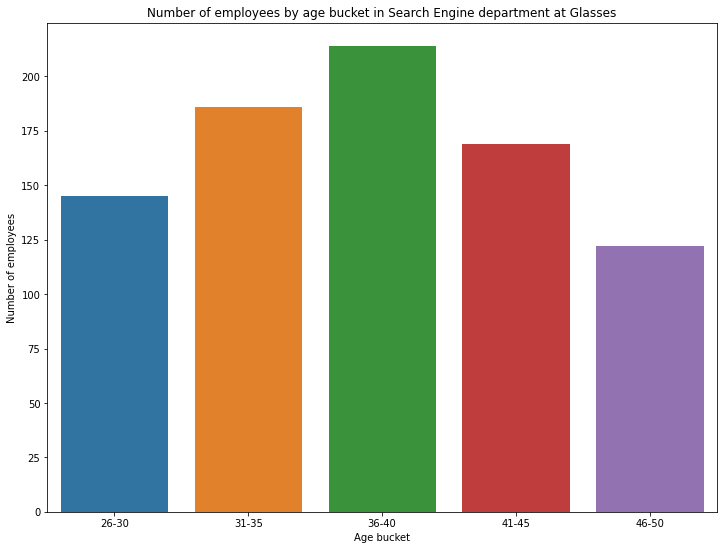

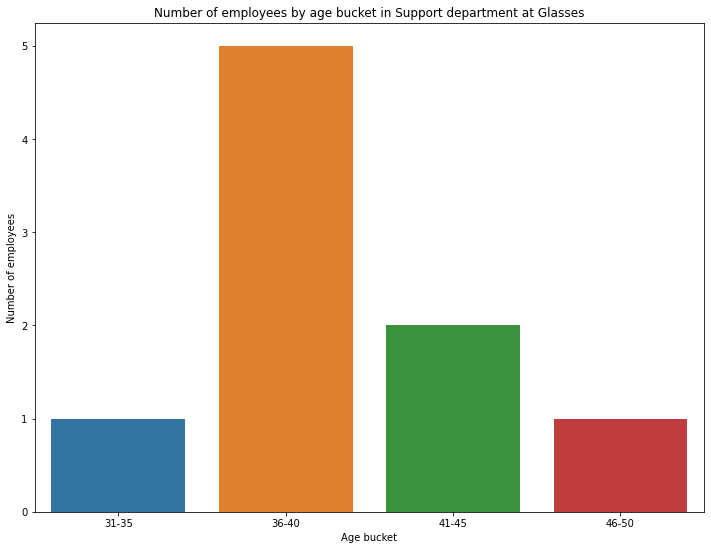

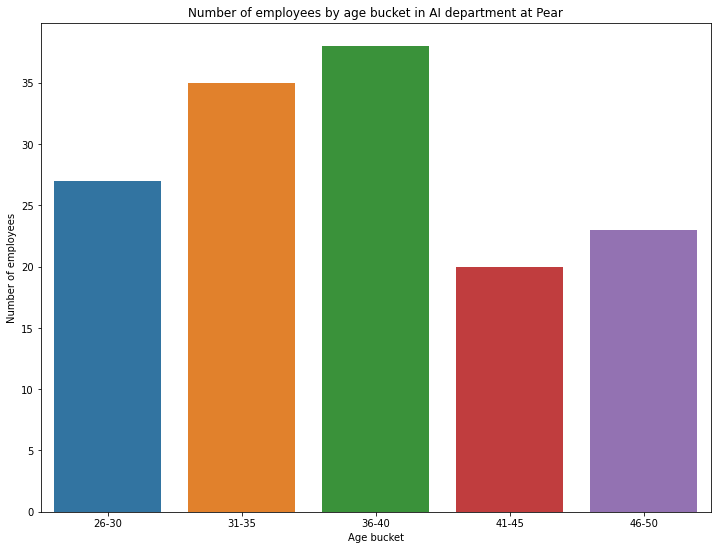

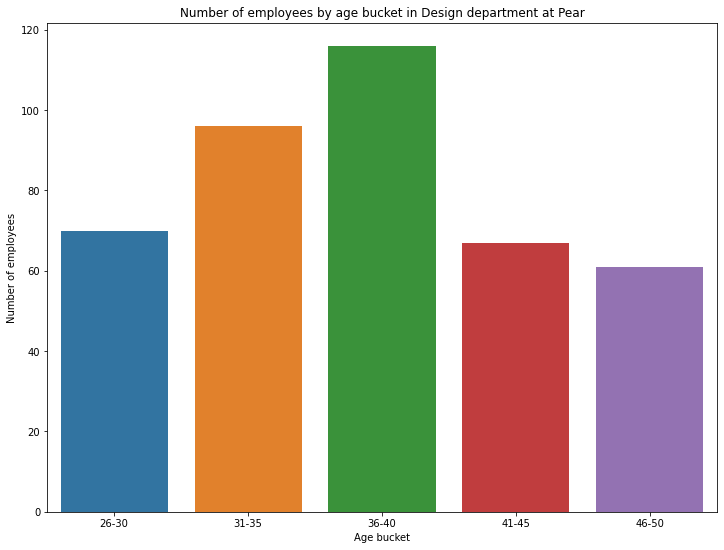

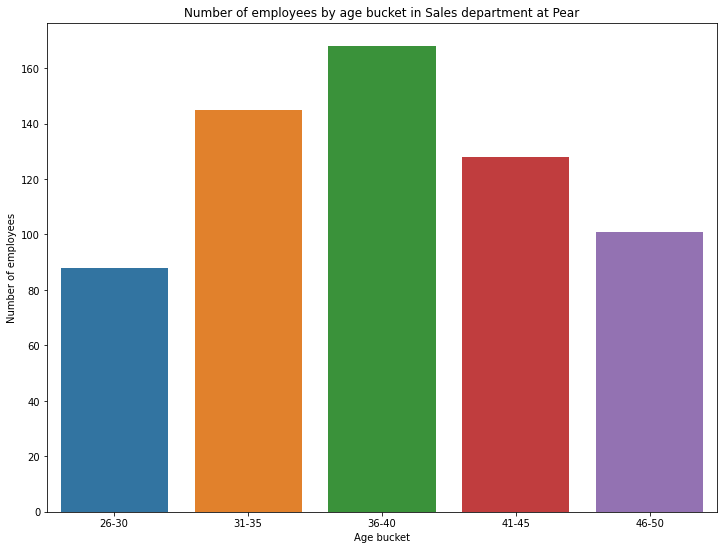

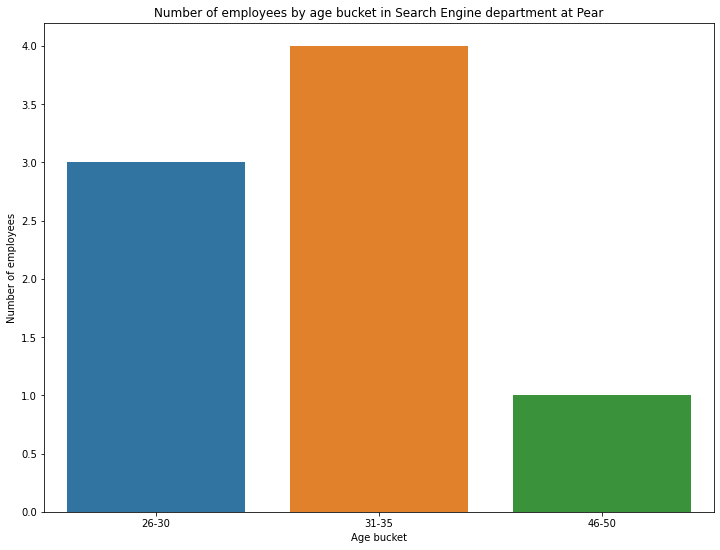

In [55]:
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['department'] == department]
        fig,ax = plt.subplots(figsize=(12,9))
        rel = sns.barplot(data=d,x='age_bucket',y='count',ci=None).set(title='Number of employees by age bucket in ' + department + ' department at ' + company,xlabel='Age bucket',ylabel='Number of employees')
        plt.show()

### Maximum, minimum and average salary for each age bucket

In [56]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    a.age_bucket,
    MAX(d.salary) AS max_salary,
    MIN(d.salary) AS min_salary,
    AVG(d.salary) AS avg_salary
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY a.age_bucket;
''',connect)
res

,age_bucket,max_salary,min_salary,avg_salary
0,26-30,153000.0,40000.0,86397.999275
1,31-35,153000.0,40000.0,86497.896943
2,36-40,153000.0,40000.0,86294.187123
3,41-45,153000.0,40000.0,87765.672098
4,46-50,153000.0,40000.0,89678.238853


### Maximum, minimum and average salary for each age bucket and company

In [57]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    a.age_bucket,
    MAX(d.salary) AS max_salary,
    MIN(d.salary) AS min_salary,
    AVG(d.salary) AS avg_salary
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,a.age_bucket;
''',connect)
res

,company,age_bucket,max_salary,min_salary,avg_salary
0,Cheerper,26-30,147670.003681,40000.0,74257.918204
1,Cheerper,31-35,153000.000000,40000.0,73863.231422
2,Cheerper,36-40,153000.000000,40000.0,75021.204531
3,Cheerper,41-45,153000.000000,40000.0,75759.380841
4,Cheerper,46-50,150847.229633,40000.0,79327.772067
5,Glasses,26-30,153000.000000,40000.0,86352.878237
6,Glasses,31-35,153000.000000,40000.0,87417.521194
7,Glasses,36-40,153000.000000,40000.0,86328.312621
8,Glasses,41-45,153000.000000,40000.0,89309.741804
9,Glasses,46-50,153000.000000,40000.0,90351.417801


### Employees maximum, minimum and average salary by age bucket, company and department

In [58]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    d.department,
    a.age_bucket,
    MAX(d.salary) AS max_salary,
    MIN(d.salary) AS min_salary,
    AVG(d.salary) AS avg_salary
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,d.department,a.age_bucket;
''',connect)
res

,company,department,age_bucket,max_salary,min_salary,avg_salary
0,Cheerper,AI,26-30,136677.646662,92883.289141,115941.160895
1,Cheerper,AI,31-35,118223.153127,100970.469958,109596.811543
2,Cheerper,AI,36-40,153000.000000,93133.482116,128829.090327
3,Cheerper,AI,41-45,153000.000000,55784.902664,115605.232292
4,Cheerper,AI,46-50,131994.347407,87974.114113,105420.186481
...,...,...,...,...,...,...
62,Pear,Sales,41-45,153000.000000,48449.385013,112057.641204
63,Pear,Sales,46-50,153000.000000,50872.936362,113234.919305
64,Pear,Search Engine,26-30,92260.521693,47928.114918,68368.612386
65,Pear,Search Engine,31-35,66703.017427,40000.000000,53149.596883


### Maximum, minimum and average bonus for each age bucket

In [59]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    a.age_bucket,
    MAX(d.annual_bonus) AS max_bonus,
    MIN(d.annual_bonus) AS min_bonus,
    AVG(d.annual_bonus) AS avg_bonus
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY a.age_bucket;
''',connect)
res

,age_bucket,max_bonus,min_bonus,avg_bonus
0,26-30,24792.91,9000.0,19951.863560
1,31-35,24792.91,9000.0,19078.305595
2,36-40,24792.91,9000.0,18506.253960
3,41-45,24792.91,9000.0,18026.451950
4,46-50,24792.91,9000.0,17443.723818


### Maximum, minimum and average bonus for each age bucket and company

In [60]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    a.age_bucket,
    MAX(d.annual_bonus) AS max_bonus,
    MIN(d.annual_bonus) AS min_bonus,
    AVG(d.annual_bonus) AS avg_bonus
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,a.age_bucket;
''',connect)
res

,company,age_bucket,max_bonus,min_bonus,avg_bonus
0,Cheerper,26-30,24792.91,9000.000000,19016.066674
1,Cheerper,31-35,24792.91,9000.000000,18359.193737
2,Cheerper,36-40,24792.91,9000.000000,17753.602973
3,Cheerper,41-45,24792.91,9000.000000,17178.030541
4,Cheerper,46-50,24792.91,9000.000000,16538.599870
5,Glasses,26-30,24792.91,9000.000000,20006.449824
6,Glasses,31-35,24792.91,9000.000000,18939.132641
7,Glasses,36-40,24792.91,9000.000000,18616.521822
8,Glasses,41-45,24792.91,9000.000000,18280.651011
9,Glasses,46-50,24792.91,9000.000000,17422.213896


### Maximum, minimum and average bonus for each age bucket, company and department

In [61]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    d.department,
    a.age_bucket,
    MAX(d.annual_bonus) AS max_bonus,
    MIN(d.annual_bonus) AS min_bonus,
    AVG(d.annual_bonus) AS avg_bonus
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,d.department,a.age_bucket;
''',connect)
res

,company,department,age_bucket,max_bonus,min_bonus,avg_bonus
0,Cheerper,AI,26-30,18571.367430,9000.000000,16051.816254
1,Cheerper,AI,31-35,24792.910000,24232.292824,24512.601412
2,Cheerper,AI,36-40,22207.125090,10904.990605,16377.957394
3,Cheerper,AI,41-45,24792.910000,10221.591312,18904.232803
4,Cheerper,AI,46-50,20931.752993,10482.117376,15706.857362
...,...,...,...,...,...,...
62,Pear,Sales,41-45,24792.910000,9000.000000,18596.764060
63,Pear,Sales,46-50,24792.910000,9000.000000,18579.269438
64,Pear,Search Engine,26-30,22969.250207,18646.661567,20182.978070
65,Pear,Search Engine,31-35,24792.910000,16570.307090,20821.769639


### Employees by age bucket and employment type

In [62]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.employment_type,
    a.age_bucket,
    COUNT(*) AS count
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.employment_type,a.age_bucket;
''',connect)
res

,employment_type,age_bucket,count
0,CONTRACTOR,26-30,181
1,CONTRACTOR,31-35,341
2,CONTRACTOR,36-40,439
3,CONTRACTOR,41-45,376
4,CONTRACTOR,46-50,356
5,FULL_TIME,26-30,329
6,FULL_TIME,31-35,413
7,FULL_TIME,36-40,418
8,FULL_TIME,41-45,285
9,FULL_TIME,46-50,185


### Employees by age bucket, company and employment type

In [63]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    d.employment_type,
    a.age_bucket,
    COUNT(*) AS count
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,d.employment_type,a.age_bucket;
''',connect)
res

,company,employment_type,age_bucket,count
0,Cheerper,CONTRACTOR,26-30,9
1,Cheerper,CONTRACTOR,31-35,27
2,Cheerper,CONTRACTOR,36-40,37
3,Cheerper,CONTRACTOR,41-45,34
4,Cheerper,CONTRACTOR,46-50,44
5,Cheerper,FULL_TIME,26-30,31
6,Cheerper,FULL_TIME,31-35,32
7,Cheerper,FULL_TIME,36-40,39
8,Cheerper,FULL_TIME,41-45,35
9,Cheerper,FULL_TIME,46-50,21


### Employees by age bucket, company, deparment and employment type

In [64]:
res = pd.read_sql(
'''
WITH ages AS (
    SELECT
     i,
     age,
     CASE
      WHEN age BETWEEN 10 and 15 THEN '10-15'
      WHEN age BETWEEN 16 and 20 THEN '16-20'
      WHEN age BETWEEN 21 and 25 THEN '21-25'
      WHEN age BETWEEN 26 and 30 THEN '26-30'
      WHEN age BETWEEN 31 and 35 THEN '31-35'
      WHEN age BETWEEN 36 and 40 THEN '36-40'
      WHEN age BETWEEN 41 and 45 THEN '41-45'
      WHEN age BETWEEN 46 and 50 THEN '46-50'
      WHEN age BETWEEN 51 and 55 THEN '51-55'
      WHEN age BETWEEN 56 and 60 THEN '51-55'
      WHEN age BETWEEN 61 and 65 THEN '56-60'
      WHEN age BETWEEN 66 and 70 THEN '66-70'
      WHEN age BETWEEN 71 and 75 THEN '71-75'
      WHEN age BETWEEN 76 and 80 THEN '76-80'
      END AS age_bucket
    FROM data
)
SELECT
    d.company,
    d.department,
    d.employment_type,
    a.age_bucket,
    COUNT(*) AS count
FROM ages AS a
LEFT JOIN data AS d
ON a.i=d.i
GROUP BY d.company,d.department,d.employment_type,a.age_bucket;
''',connect)
res

,company,department,employment_type,age_bucket,count
0,Cheerper,AI,FULL_TIME,26-30,3
1,Cheerper,AI,FULL_TIME,36-40,4
2,Cheerper,AI,FULL_TIME,41-45,4
3,Cheerper,AI,FULL_TIME,46-50,3
4,Cheerper,AI,PART_TIME,26-30,1
...,...,...,...,...,...
160,Pear,Sales,PART_TIME,31-35,1
161,Pear,Search Engine,CONTRACTOR,26-30,2
162,Pear,Search Engine,CONTRACTOR,31-35,4
163,Pear,Search Engine,CONTRACTOR,46-50,1


### Calculating cumulative distribution of salary

In [65]:
res = pd.read_sql(
'''
SELECT
    salary,
    CUME_DIST() OVER (PARTITION BY company ORDER BY salary) AS CumeDist
FROM data;
''',connect)
res

,salary,CumeDist
0,40000.0,0.122222
1,40000.0,0.122222
2,40000.0,0.122222
3,40000.0,0.122222
4,40000.0,0.122222
...,...,...
4995,153000.0,1.000000
4996,153000.0,1.000000
4997,153000.0,1.000000
4998,153000.0,1.000000


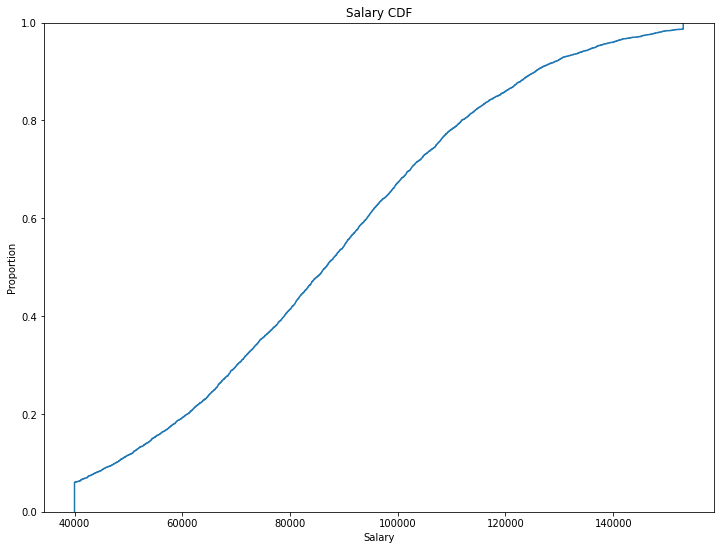

In [66]:
## This is nice to plot with seaborn
res = pd.read_sql('''SELECT salary FROM data''',connect)
fig,ax = plt.subplots(figsize=(12,9))
sns.ecdfplot(data=res, x="salary")
plt.title('Salary CDF')
plt.xlabel('Salary')
plt.show()

### Calculating cumulative distribution of salary by company

In [67]:
res = pd.read_sql(
'''
SELECT
    company,
    salary,
    CUME_DIST() OVER (PARTITION BY company ORDER BY salary) AS CumeDist
FROM data
ORDER BY company;
''',connect)
res

,company,salary,CumeDist
0,Cheerper,40000.0,0.122222
1,Cheerper,40000.0,0.122222
2,Cheerper,40000.0,0.122222
3,Cheerper,40000.0,0.122222
4,Cheerper,40000.0,0.122222
...,...,...,...
4995,Pear,153000.0,1.000000
4996,Pear,153000.0,1.000000
4997,Pear,153000.0,1.000000
4998,Pear,153000.0,1.000000


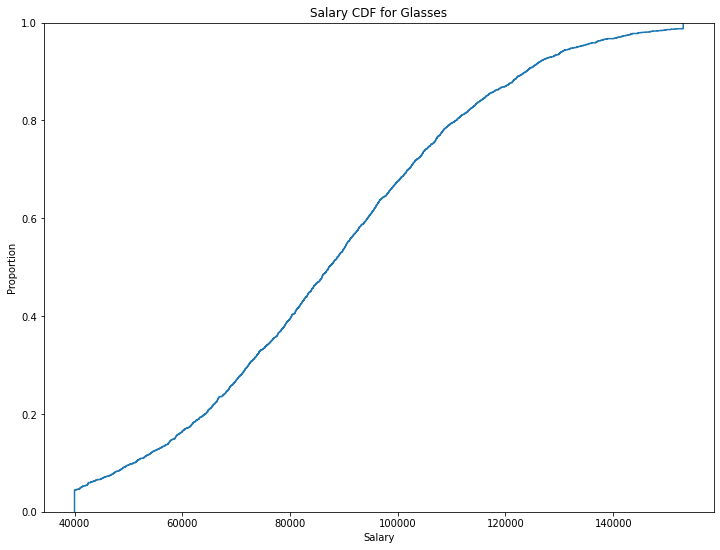

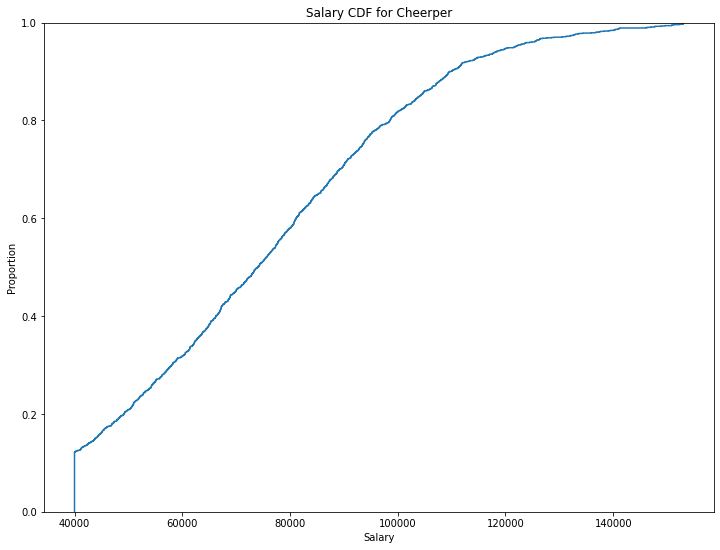

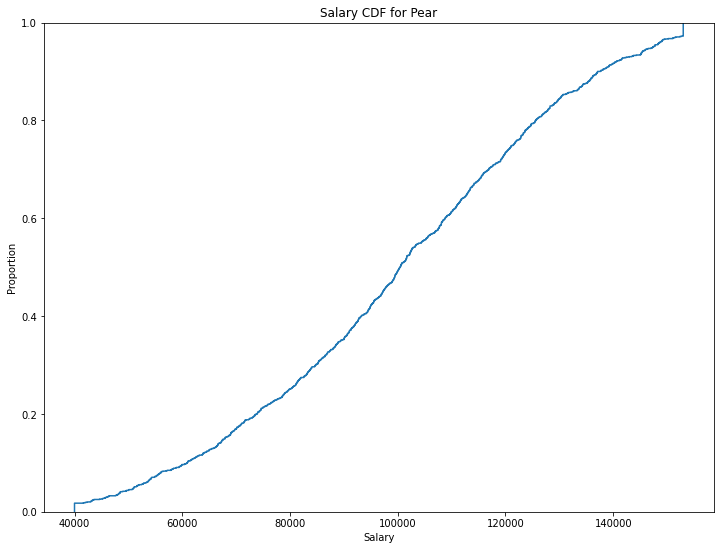

In [68]:
## This is nice to plot with seaborn
res = pd.read_sql('''SELECT company,salary FROM data''',connect)
companies = res['company'].unique()
for company in companies:
    d = res.loc[res['company'] == company]
    fig,ax = plt.subplots(figsize=(12,9))
    sns.ecdfplot(data=d, x="salary")
    plt.title('Salary CDF for ' + company)
    plt.xlabel('Salary')
    plt.show()

### Calculating cumulative distribution of salary by company and department

In [69]:
res = pd.read_sql(
'''
SELECT
    company,
    department,
    salary,
    CUME_DIST() OVER (PARTITION BY company,department ORDER BY salary) AS CumeDist
FROM data
ORDER BY company,department;
''',connect)
res

,company,department,salary,CumeDist
0,Cheerper,AI,55784.902664,0.047619
1,Cheerper,AI,76787.329734,0.095238
2,Cheerper,AI,87974.114113,0.142857
3,Cheerper,AI,89907.934093,0.190476
4,Cheerper,AI,92883.289141,0.238095
...,...,...,...,...
4995,Pear,Search Engine,59741.572844,0.500000
4996,Pear,Search Engine,64917.200547,0.625000
4997,Pear,Search Engine,65767.753631,0.750000
4998,Pear,Search Engine,66703.017427,0.875000


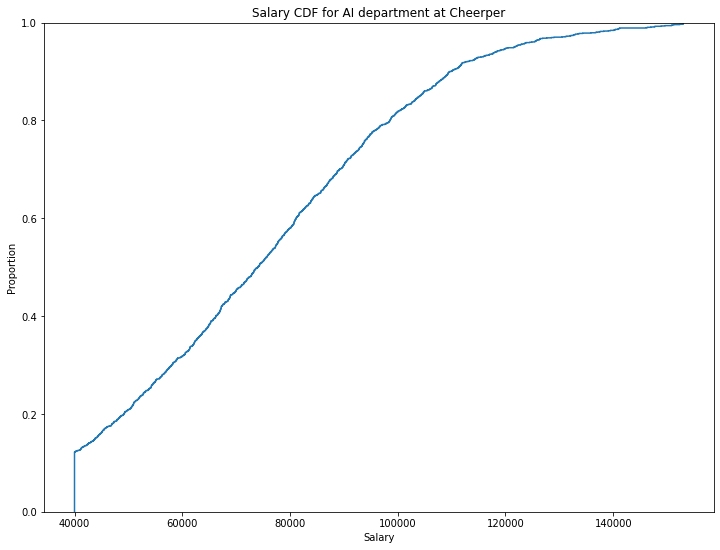

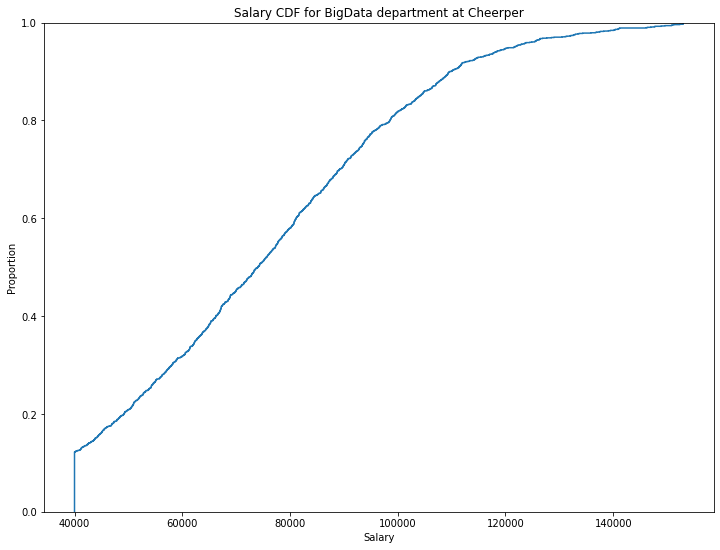

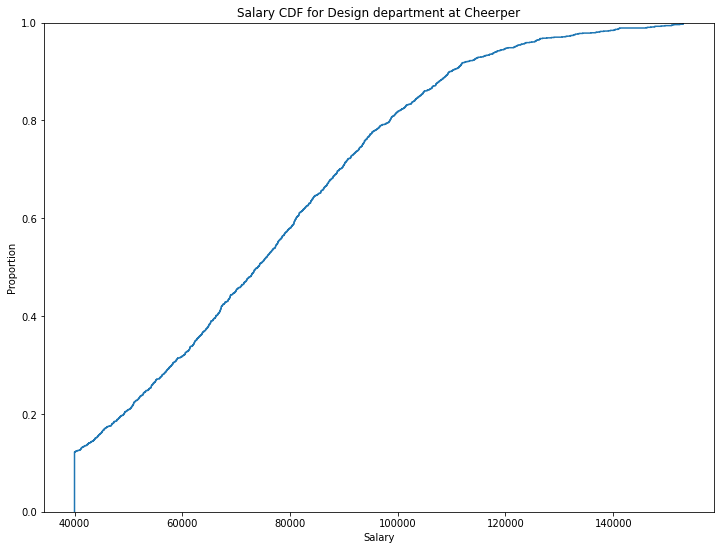

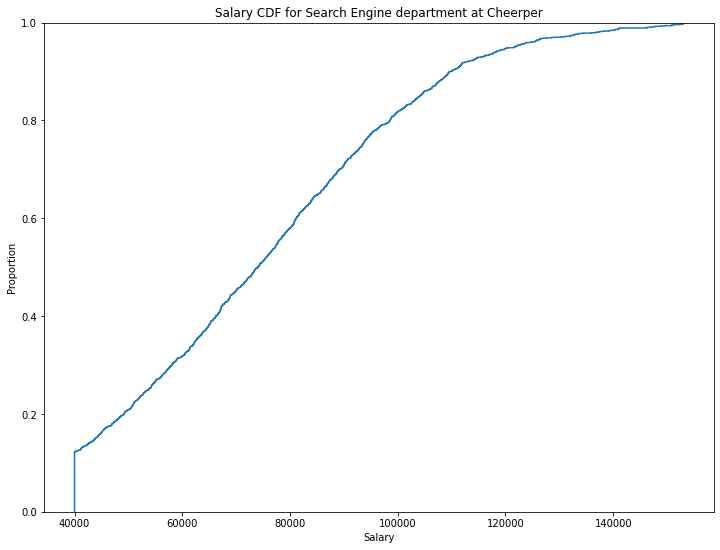

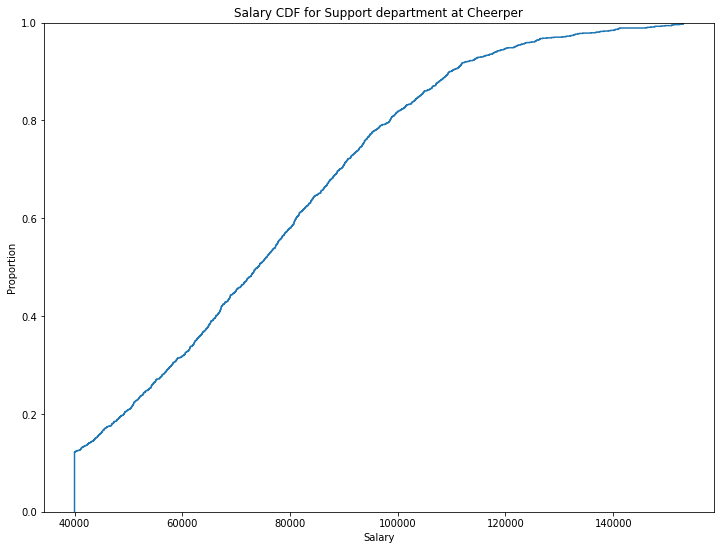

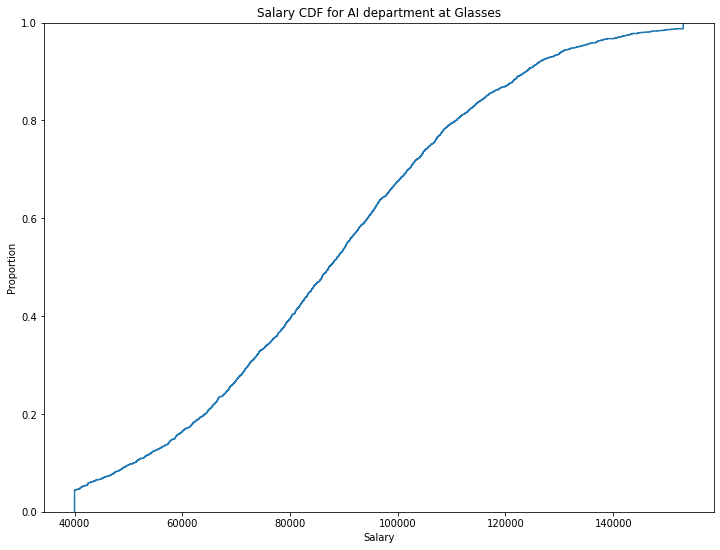

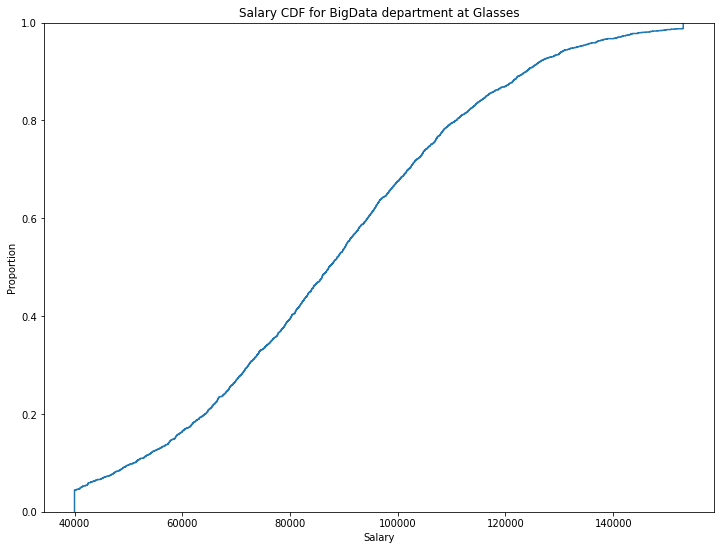

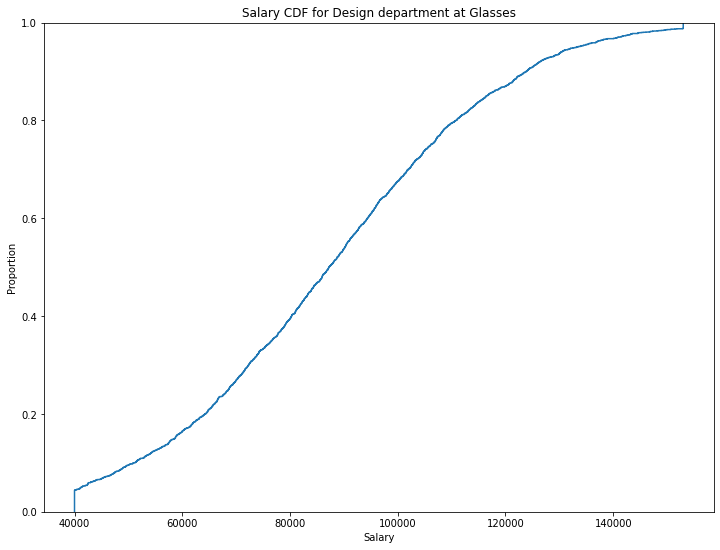

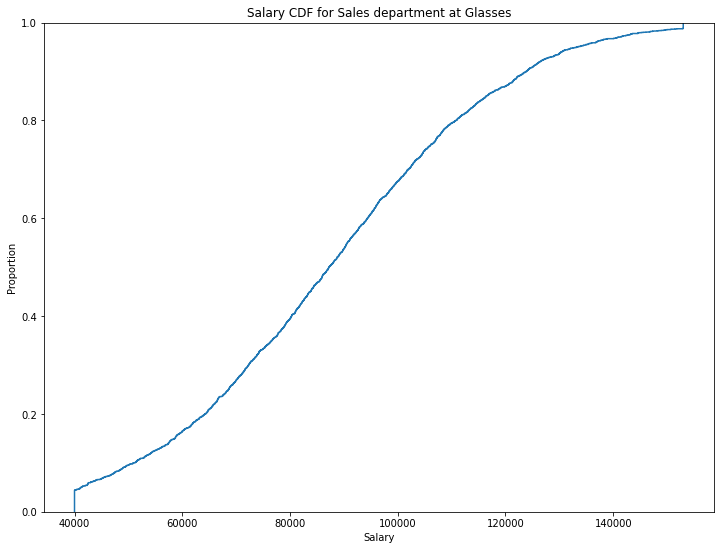

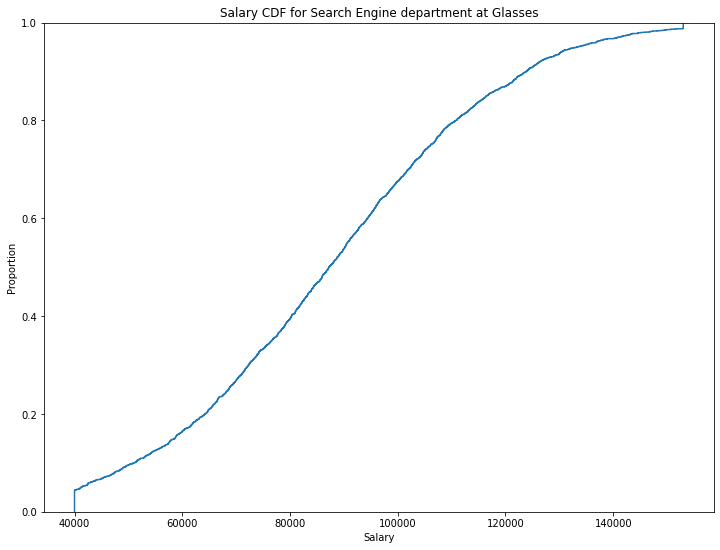

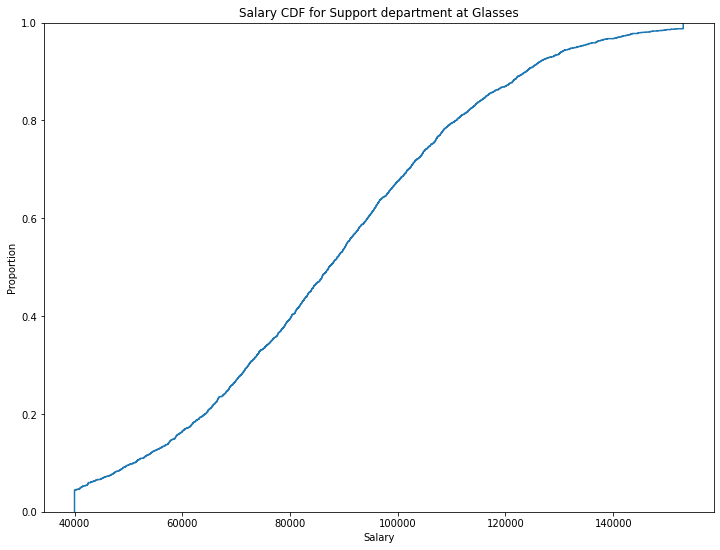

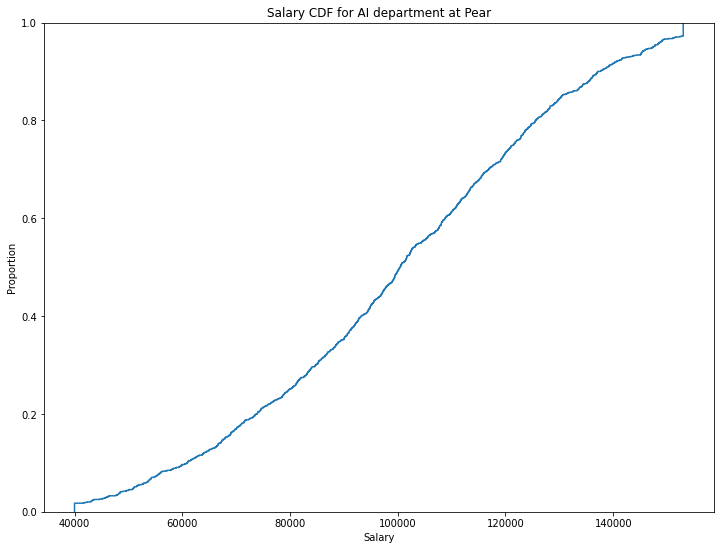

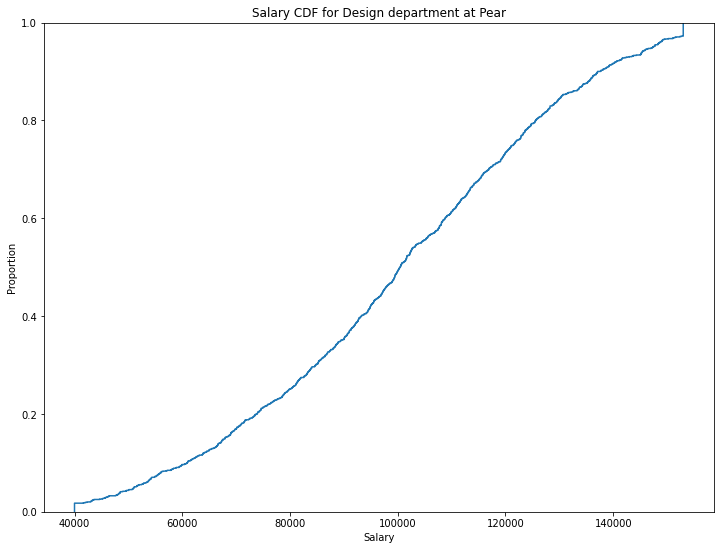

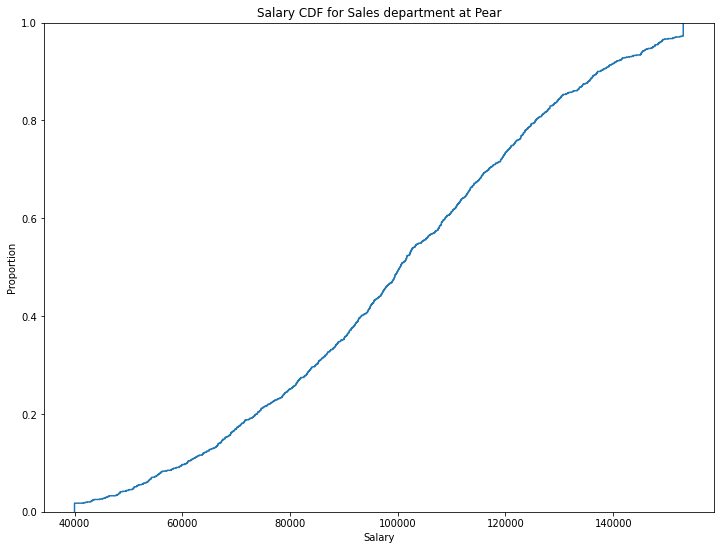

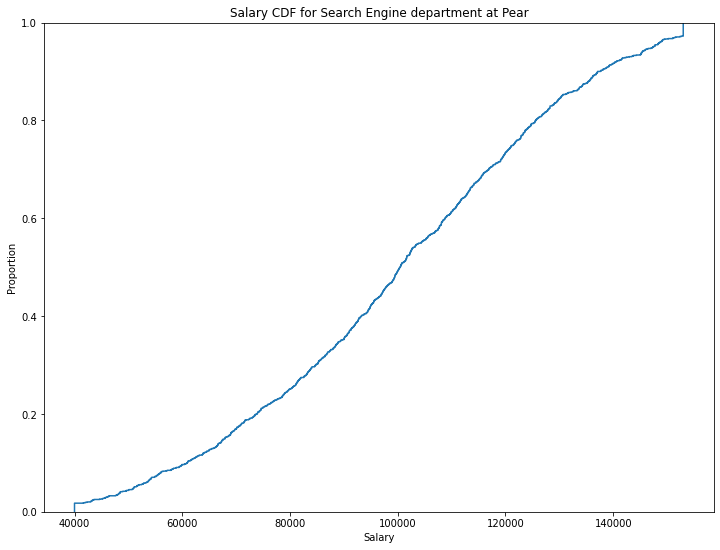

In [70]:
companies = res['company'].unique()
for company in companies:
    c = res.loc[res['company'] == company]
    departments = c['department'].unique()
    for department in departments:
        d = c.loc[c['company'] == company]
        fig,ax = plt.subplots(figsize=(12,9))
        sns.ecdfplot(data=d, x="salary")
        plt.title('Salary CDF for ' + department + ' department at ' + company)
        plt.xlabel('Salary')
        plt.show()

### Calculating how many employees are making minimum salary

In [71]:
res = pd.read_sql(
'''
WITH min_salary AS(
SELECT
    MIN(salary) AS min_salary
FROM data
)
SELECT
    ms.min_salary,
    COUNT(*) AS count
FROM data AS d
INNER JOIN min_salary AS ms
ON d.salary=ms.min_salary;
''',connect)
res

,min_salary,count
0,40000.0,301


### Calculating how many employees are making maximum salary

In [72]:
res = pd.read_sql(
'''
WITH max_salary AS(
SELECT
    MAX(salary) AS max_salary
FROM data
)
SELECT
    ms.max_salary,
    COUNT(*) AS count
FROM data AS d
INNER JOIN max_salary AS ms
ON d.salary=ms.max_salary;
''',connect)
res

,max_salary,count
0,153000.0,66
